## Submitted by Mahfooj Ali
##Assignment 2



In [52]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy import ndimage
from scipy.signal import wiener
import math

# Load CIFAR-10 dataset
transform_load = transforms.Compose([transforms.ToTensor()])
dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_load)

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Select one image from each class
selected_images = []
selected_labels = []
class_found = [False] * 10

for img, label in dataset:
    if not class_found[label]:
        selected_images.append(img)
        selected_labels.append(label)
        class_found[label] = True
        if all(class_found):
            break

print("Selected images from each class:")
for i, label in enumerate(selected_labels):
    print(f"Image {i+1}: {class_names[label]}")

# Convert tensor images to numpy arrays for processing
def tensor_to_numpy(tensor_img):
    """Convert tensor image to numpy array (H, W, C)"""
    return tensor_img.permute(1, 2, 0).numpy()

def numpy_to_tensor(numpy_img):
    """Convert numpy array to tensor (C, H, W)"""
    return torch.tensor(numpy_img).permute(2, 0, 1).float()

# Convert all selected images to numpy format
numpy_images = [tensor_to_numpy(img) for img in selected_images]


Selected images from each class:
Image 1: frog
Image 2: truck
Image 3: deer
Image 4: automobile
Image 5: bird
Image 6: horse
Image 7: ship
Image 8: cat
Image 9: dog
Image 10: airplane


##Q1


Q1: Image Rotation

Verifying rotation with n=4, angle=90.0° per rotation:
Rotation 1: angle = 90.0°
Rotation 2: angle = 180.0°
Rotation 3: angle = 270.0°
Rotation 4: angle = 360.0°
Mean absolute difference: 0.025246


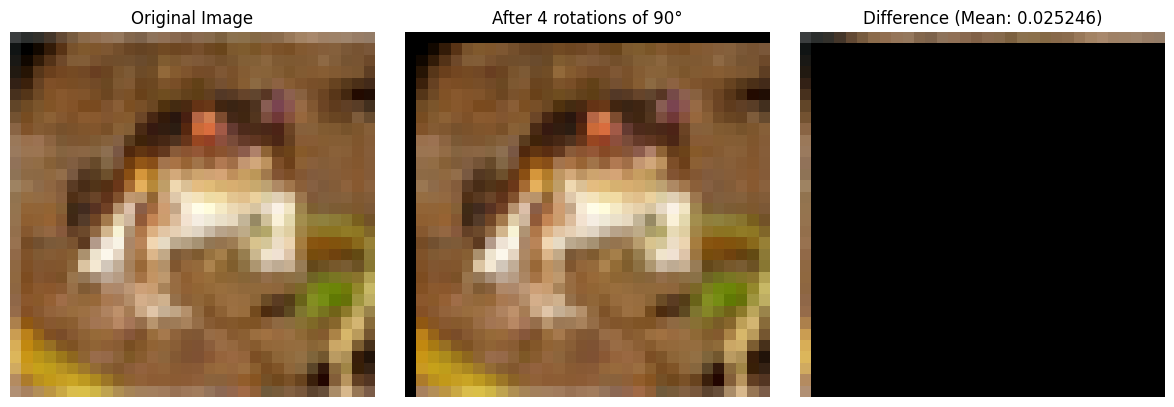


CONCLUSION:
- In theory: YES, perfect reconstruction should occur ,  In practice: Nearly perfect reconstruction with tiny numerical errors
  Errors are due to:  1. Floating-point precision limitations , Interpolation during rotation (pixel resampling , Rounding errors in trigonometric calculations 


In [46]:
def rotate_image(image, angle_degrees, center=None):
    """Rotate image by specified angle about center"""
    if len(image.shape) == 3:
        h, w = image.shape[:2]
    else:
        h, w = image.shape

    if center is None:
        center = (w // 2, h // 2)

    # Get rotation matrix
    M = cv2.getRotationMatrix2D(center, angle_degrees, 1.0)

    # Apply rotation
    if len(image.shape) == 3:
        rotated = cv2.warpAffine(image, M, (w, h))
    else:
        rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

def verify_rotation(image, n=4):
    """Verify that rotating n times by 2π/n returns original image"""
    angle = 360 / n  # 2π/n in degrees
    current_img = image.copy()

    print(f"\nVerifying rotation with n={n}, angle={angle}° per rotation:")

    for i in range(n):
        current_img = rotate_image(current_img, angle)
        print(f"Rotation {i+1}: angle = {(i+1)*angle}°")

    # Calculate difference between original and final rotated image
    diff = np.mean(np.abs(image - current_img))
    print(f"Mean absolute difference: {diff:.6f}")

    return current_img, diff

# Test rotation on first image
print("\n" + "="*50)
print("Q1: Image Rotation")
print("="*50)

test_img = numpy_images[0]
result_img, difference = verify_rotation(test_img, n=4)

# Visualize rotation verification
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(test_img)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(result_img)
axes[1].set_title(f'After 4 rotations of 90°')
axes[1].axis('off')

axes[2].imshow(np.abs(test_img - result_img))
axes[2].set_title(f'Difference (Mean: {difference:.6f})')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print()
print("CONCLUSION:")
print("- In theory: YES, perfect reconstruction should occur ,  In practice: Nearly perfect reconstruction with tiny numerical errors")
print("  Errors are due to:  1. Floating-point precision limitations , Interpolation during rotation (pixel resampling , Rounding errors in trigonometric calculations ")


##Q2

Histogram Analysis

Processing frog (Image 1)


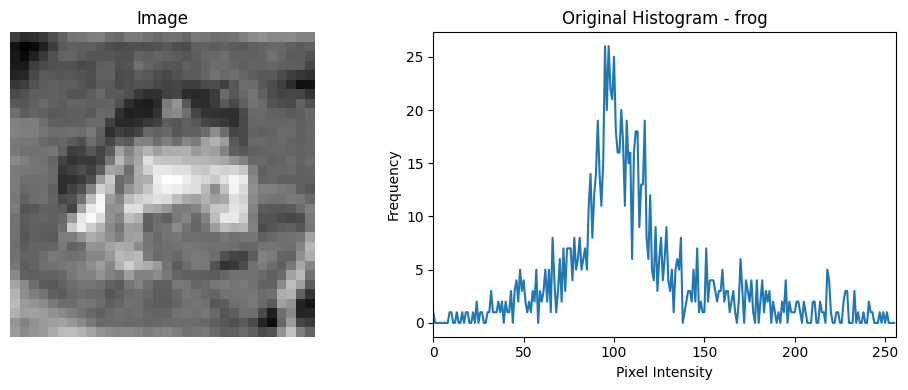


Processing truck (Image 2)


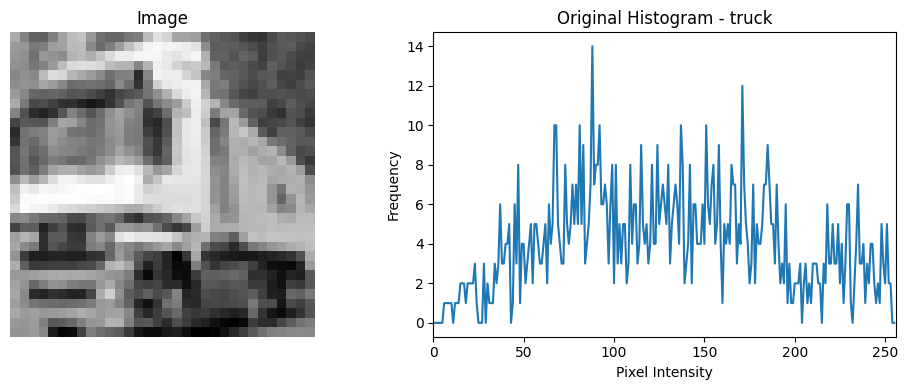


Processing deer (Image 3)


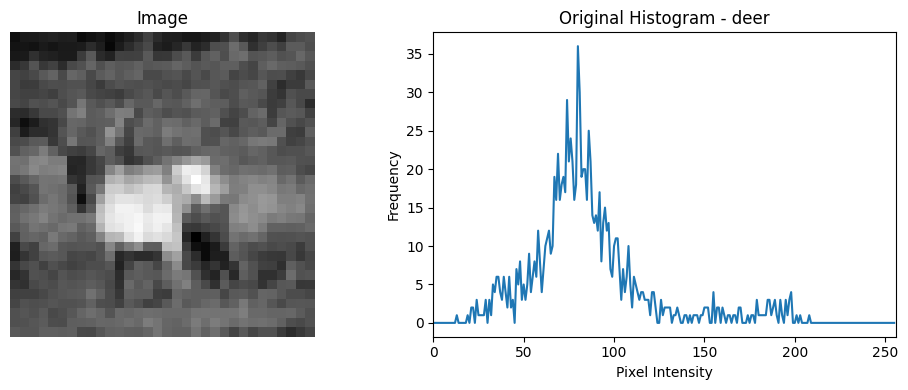


Processing automobile (Image 4)


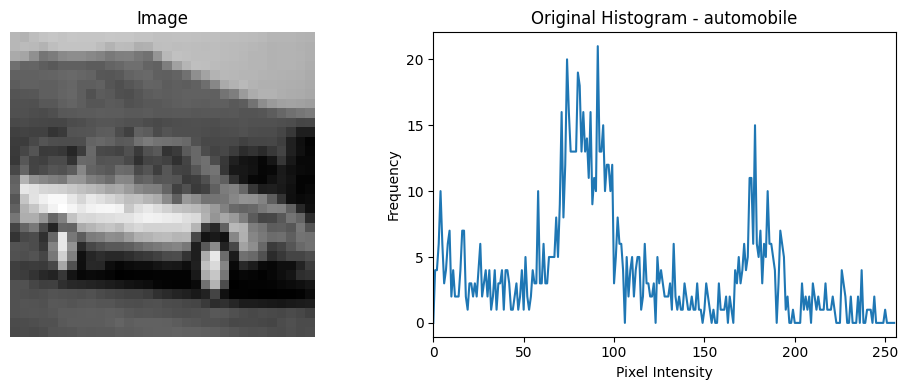


Processing bird (Image 5)


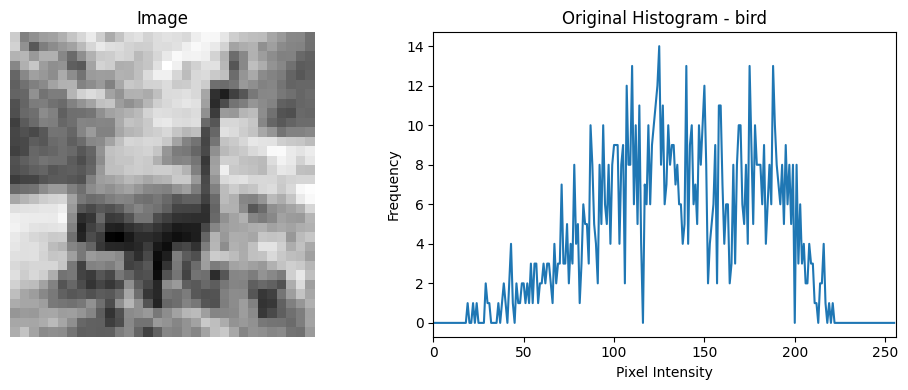


Processing horse (Image 6)


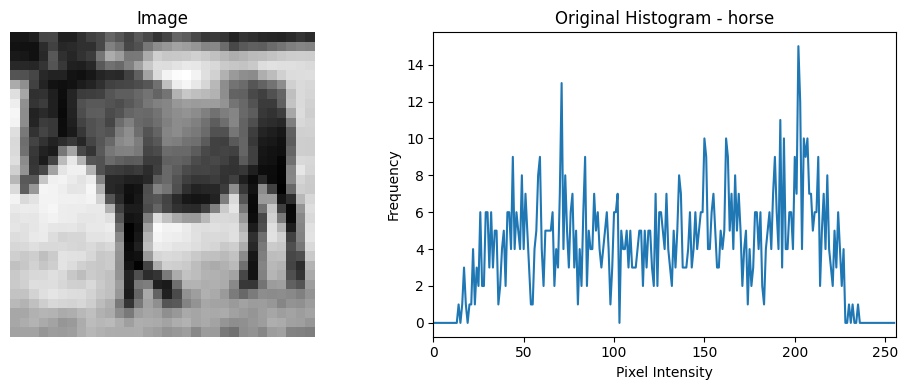


Processing ship (Image 7)


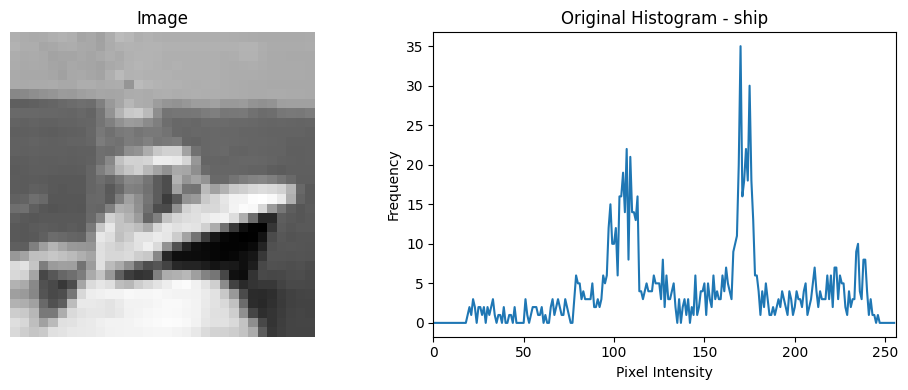


Processing cat (Image 8)


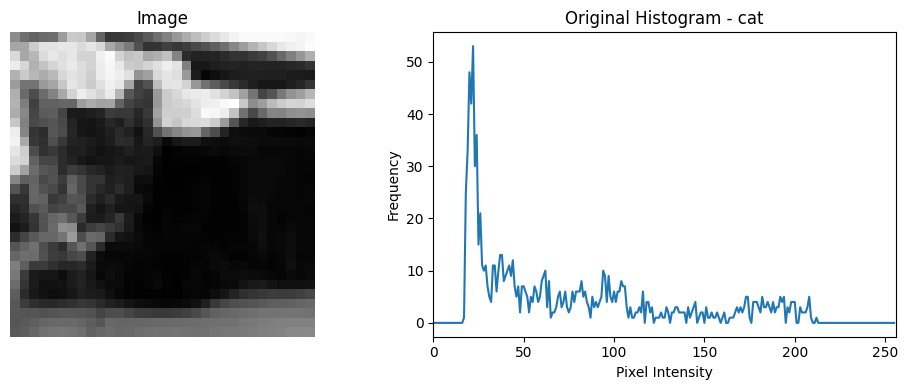


Processing dog (Image 9)


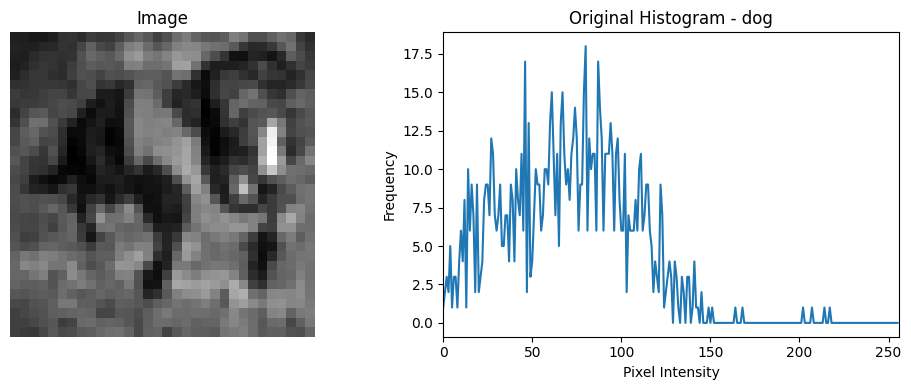


Processing airplane (Image 10)


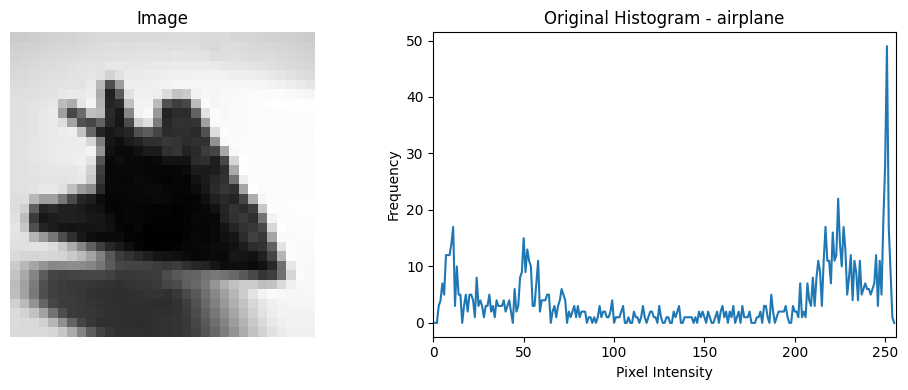

In [47]:
def rgb_to_grayscale(image):
    """Convert RGB image to grayscale"""
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def plot_histogram(image, title="Histogram"):
    """Generate and plot histogram for grayscale image"""
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.plot(hist)
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

    return hist


print("Histogram Analysis")

# Process all 10 images
for i, (img, label) in enumerate(zip(numpy_images, selected_labels)):
    print(f"\nProcessing {class_names[label]} (Image {i+1})")

    # Convert to grayscale
    gray_img = rgb_to_grayscale((img * 255).astype(np.uint8))

    hist_original = plot_histogram(gray_img, f"Original Histogram - {class_names[label]}")



##Q2(b)

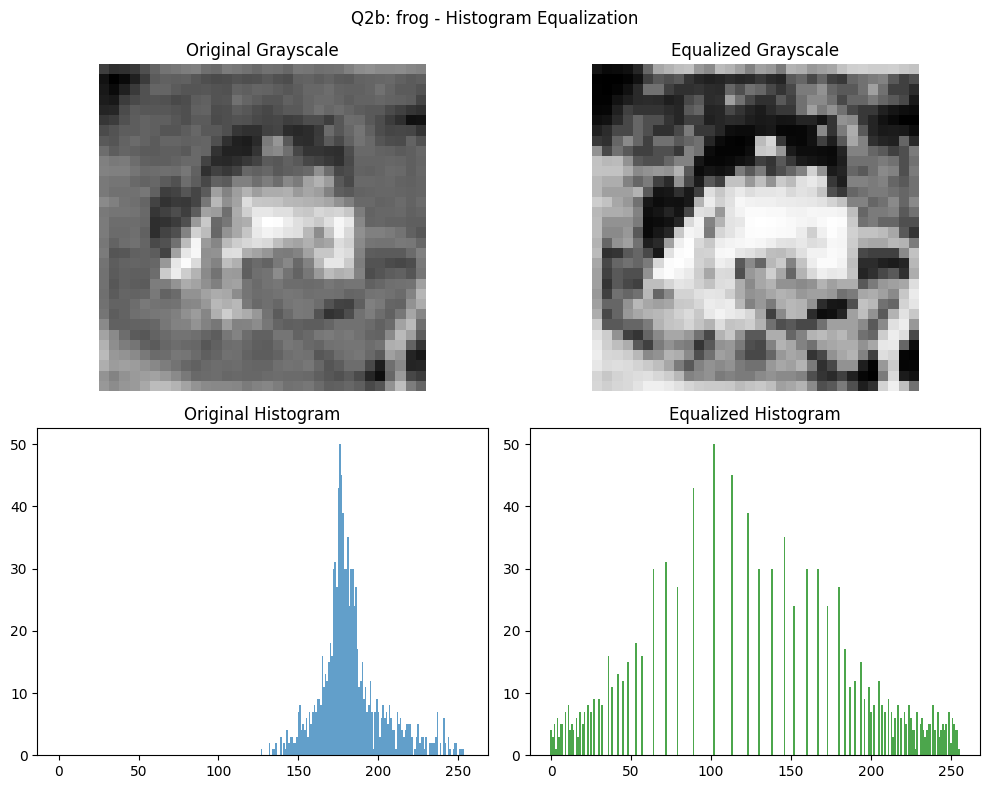

Processed: frog


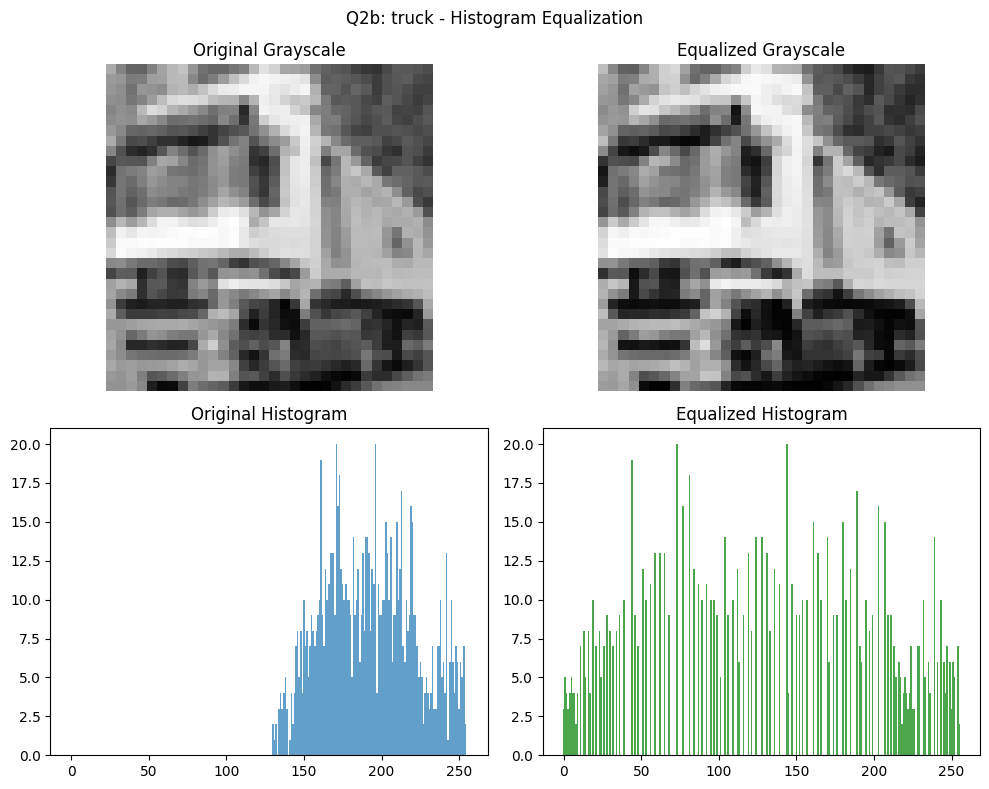

Processed: truck


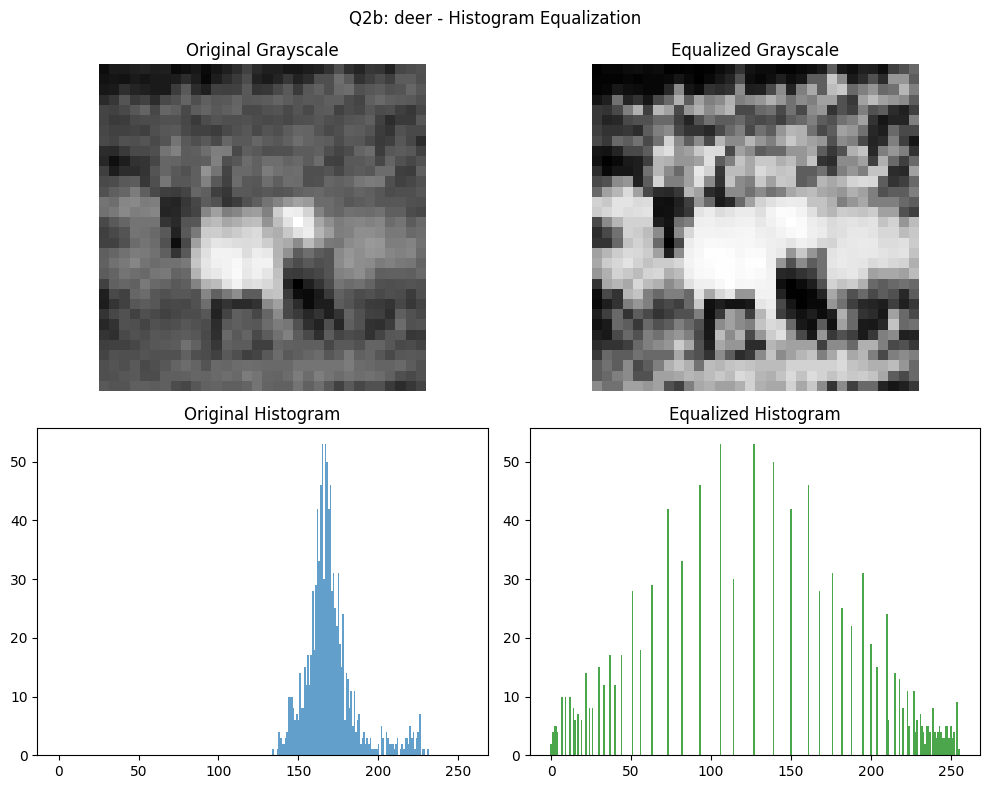

Processed: deer


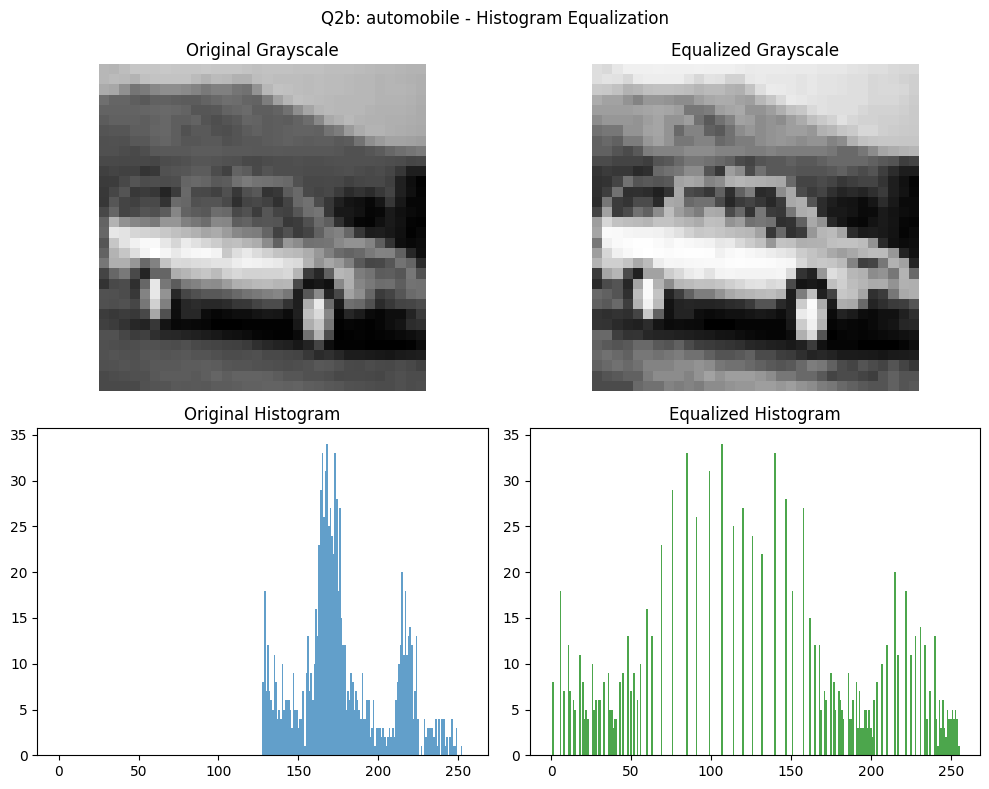

Processed: automobile


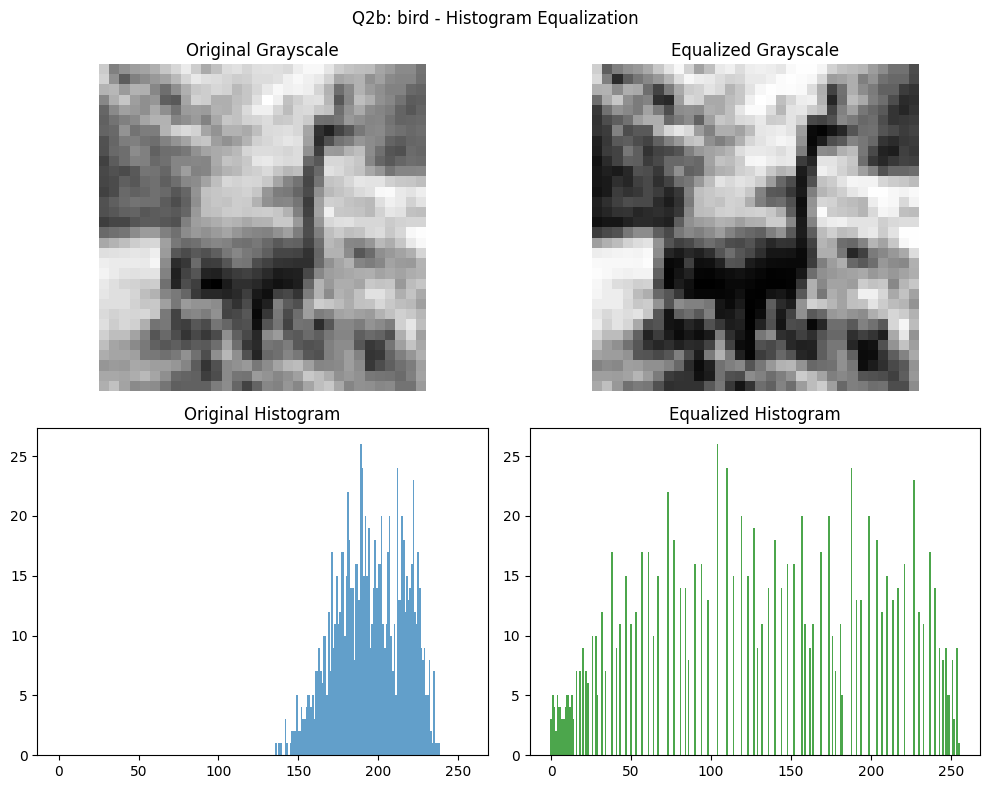

Processed: bird


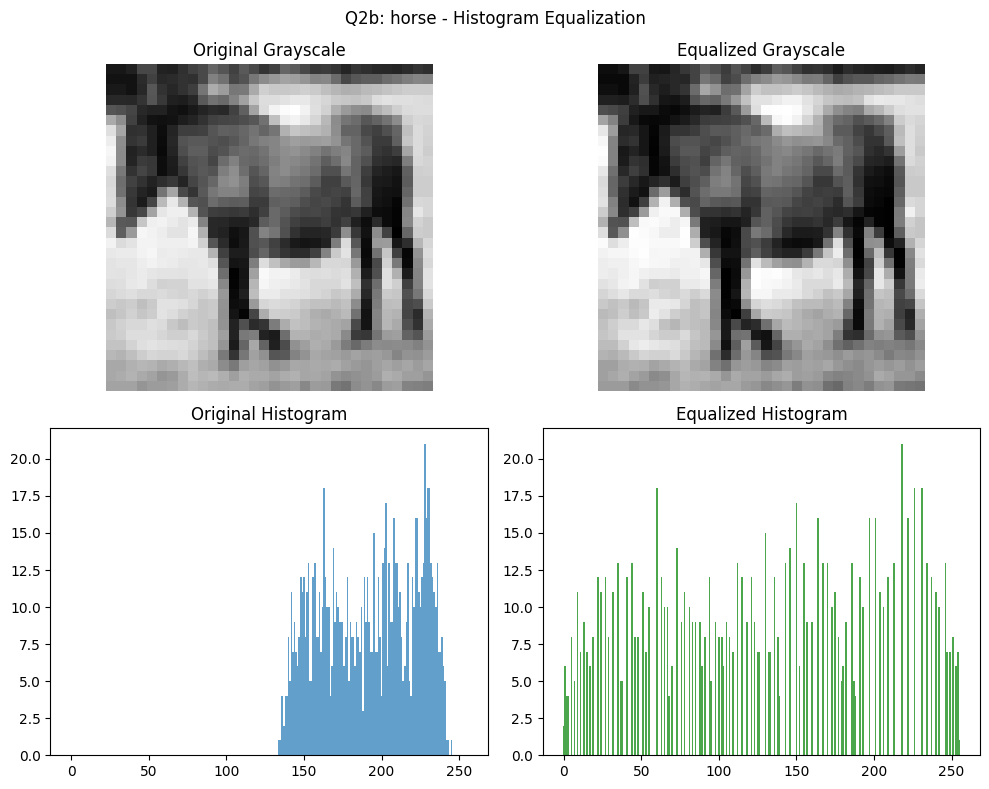

Processed: horse


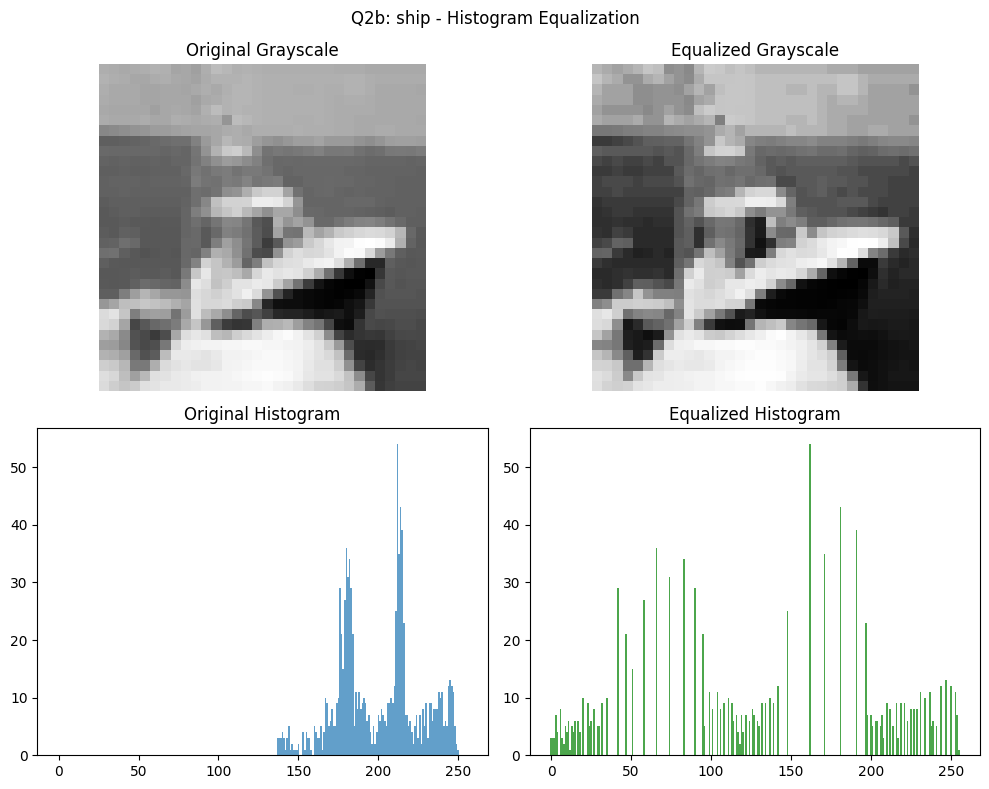

Processed: ship


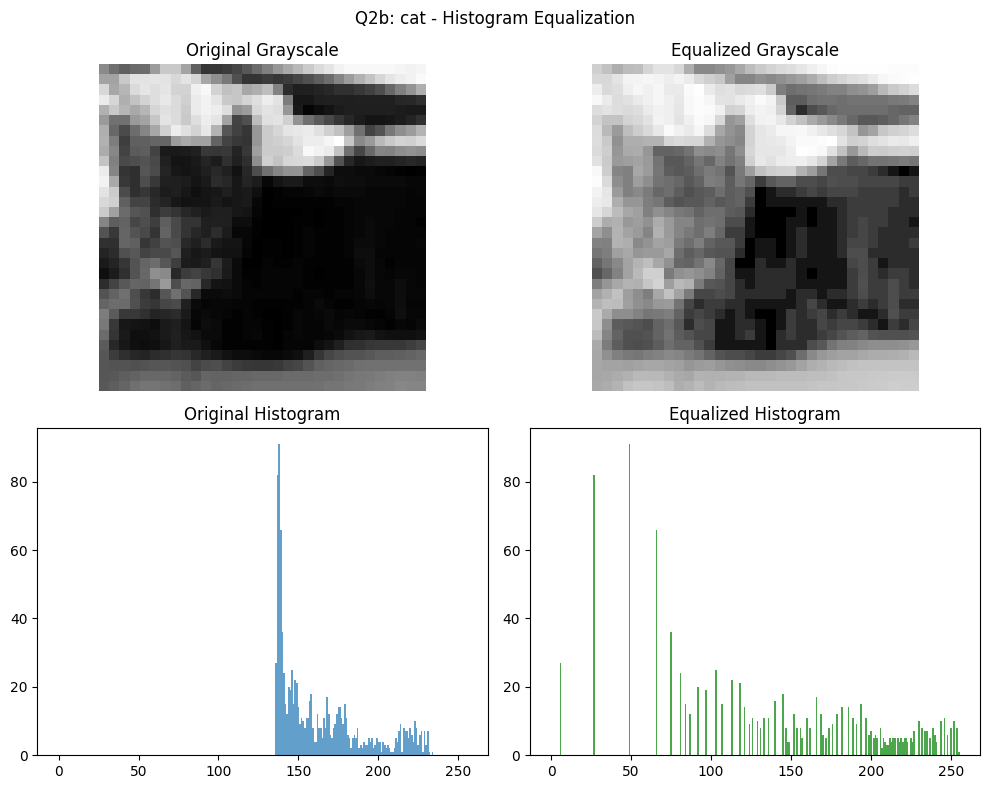

Processed: cat


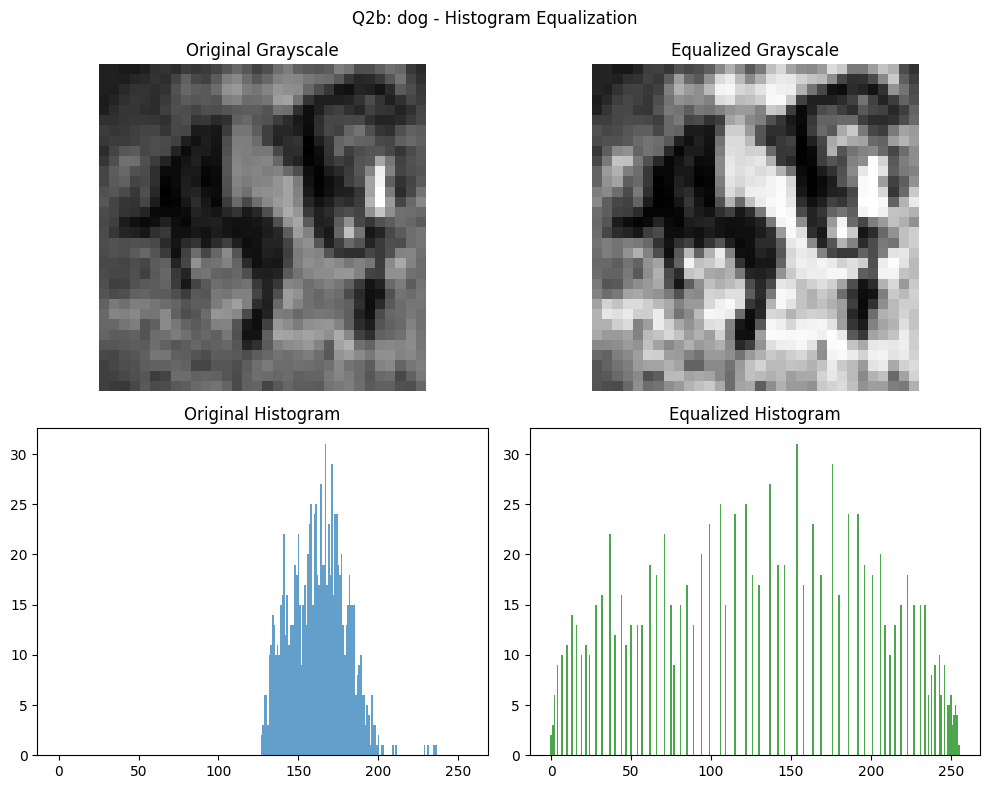

Processed: dog


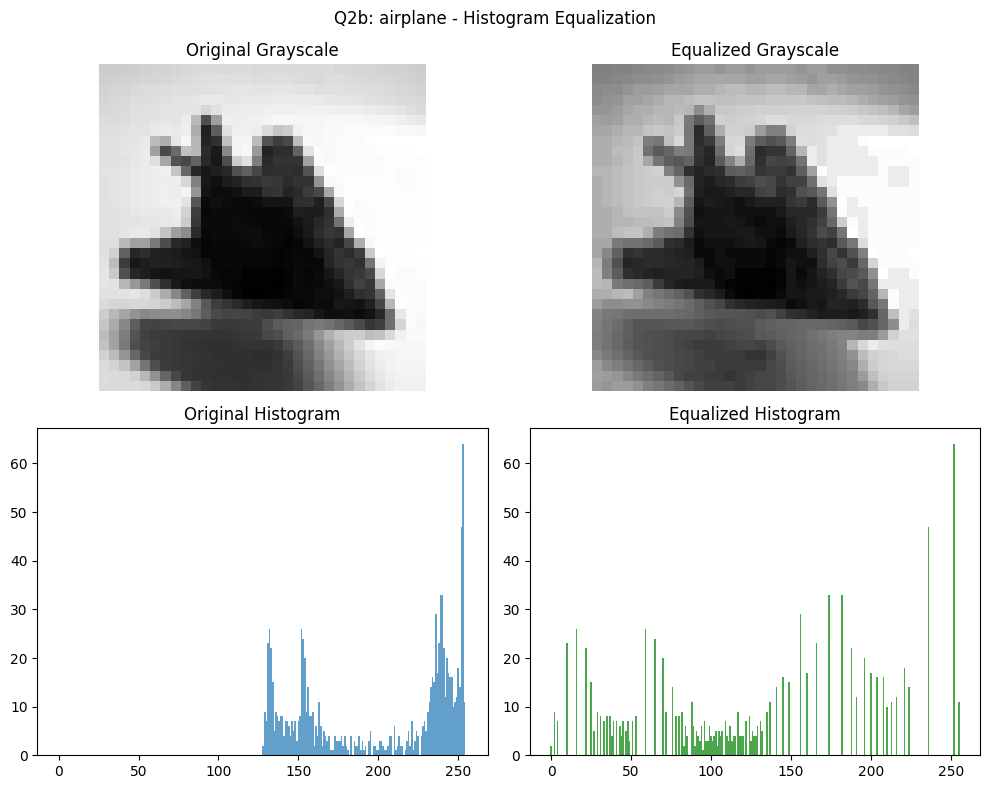

Processed: airplane


In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Utility to convert tensor to NumPy image
def tensor_to_np_image(tensor_img):
    # Unnormalize from [-1, 1] to [0, 1]
    img = tensor_img * 0.5 + 0.5
    img = img.permute(1, 2, 0)  # [C, H, W] -> [H, W, C]
    img_np = img.numpy()
    return img_np

def rgb_to_gray(image):
    """Convert RGB to grayscale"""
    image_uint8 = (image * 255).astype(np.uint8)
    return cv2.cvtColor(image_uint8, cv2.COLOR_RGB2GRAY)

def histogram_equalization(image):
    """Apply histogram equalization"""
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * 255 / cdf[-1]
    equalized = np.interp(image.flatten(), bins[:-1], cdf_normalized)
    return equalized.reshape(image.shape).astype(np.uint8)

def compare_equalization(tensor_img, class_name):
    """Compare original and equalized images"""
    rgb_img = tensor_to_np_image(tensor_img)
    gray_img = rgb_to_gray(rgb_img)
    equalized_img = histogram_equalization(gray_img)

    # Histograms
    hist_orig = np.histogram(gray_img.flatten(), 256, [0, 256])[0]
    hist_eq = np.histogram(equalized_img.flatten(), 256, [0, 256])[0]

    # Plot
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    axes[0, 0].imshow(gray_img, cmap='gray')
    axes[0, 0].set_title('Original Grayscale')
    axes[0, 0].axis('off')

    axes[0, 1].imshow(equalized_img, cmap='gray')
    axes[0, 1].set_title('Equalized Grayscale')
    axes[0, 1].axis('off')

    axes[1, 0].bar(range(256), hist_orig, width=1, alpha=0.7)
    axes[1, 0].set_title('Original Histogram')

    axes[1, 1].bar(range(256), hist_eq, width=1, alpha=0.7, color='green')
    axes[1, 1].set_title('Equalized Histogram')

    plt.suptitle(f'Q2b: {class_name} - Histogram Equalization')
    plt.tight_layout()
    plt.show()

# Run the function on selected images
for i, (img_tensor, label) in enumerate(zip(selected_images, selected_labels)):
    compare_equalization(img_tensor, class_names[label])
    print(f"Processed: {class_names[label]}")


##Q3

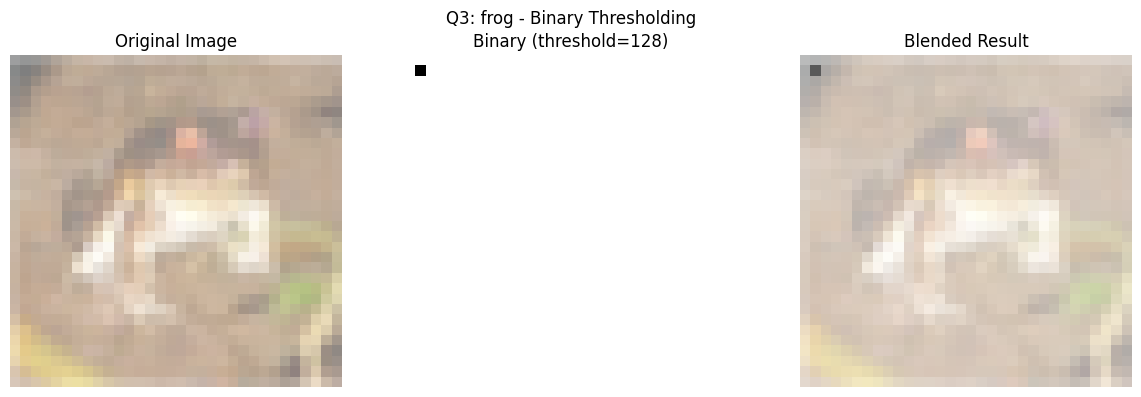

Processed frog


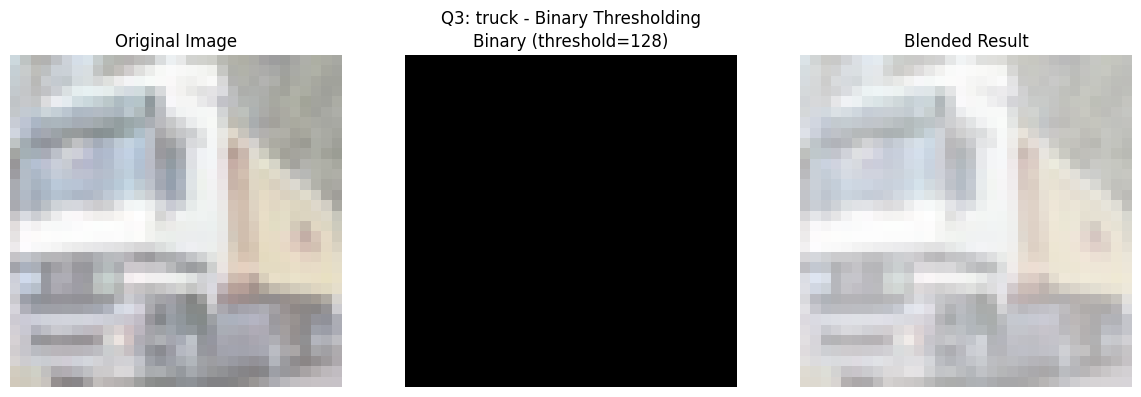

Processed truck


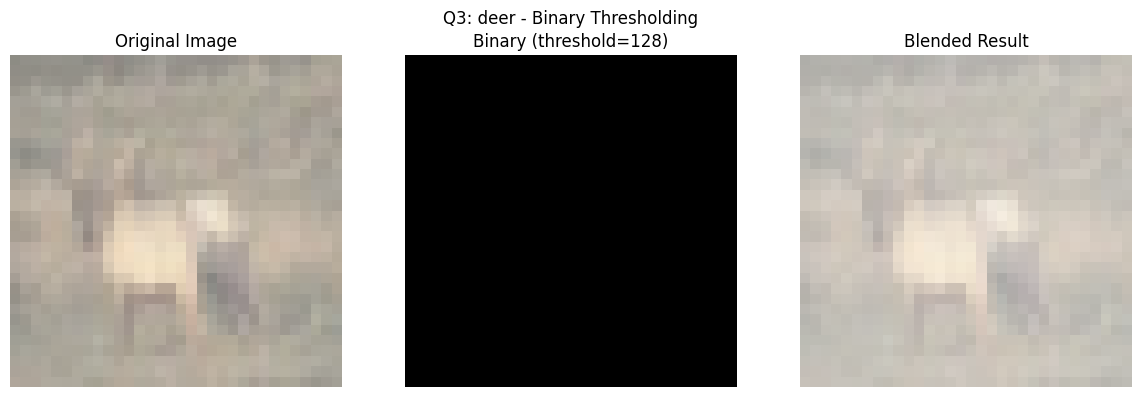

Processed deer


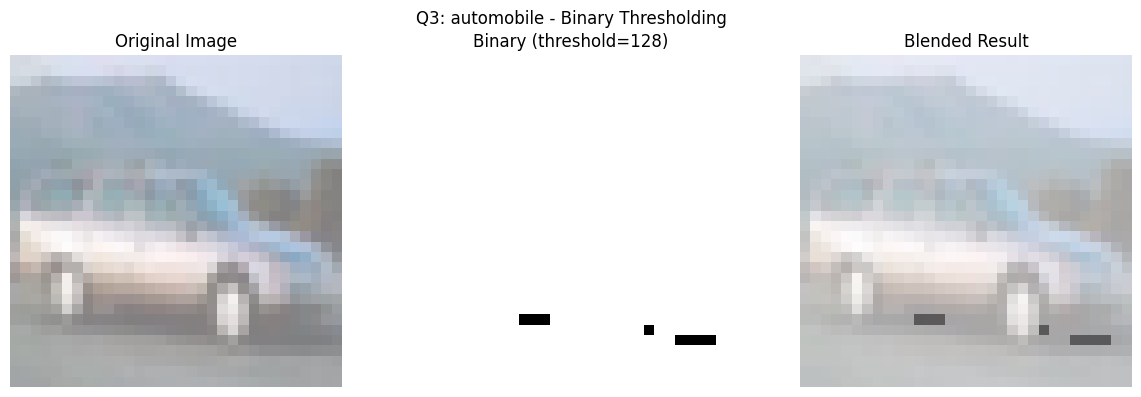

Processed automobile


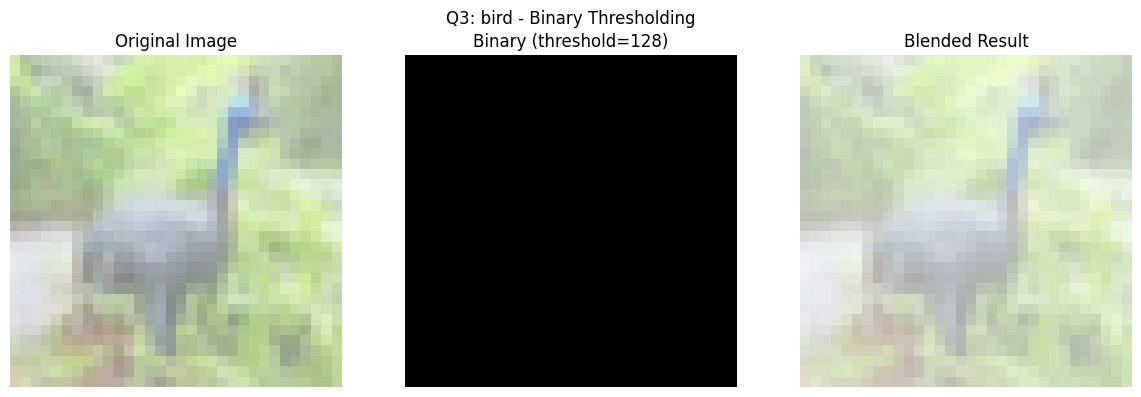

Processed bird


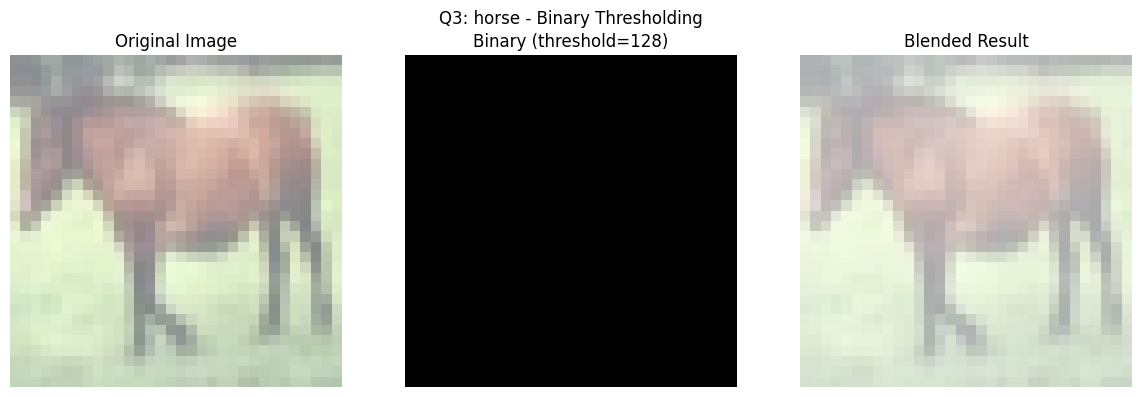

Processed horse


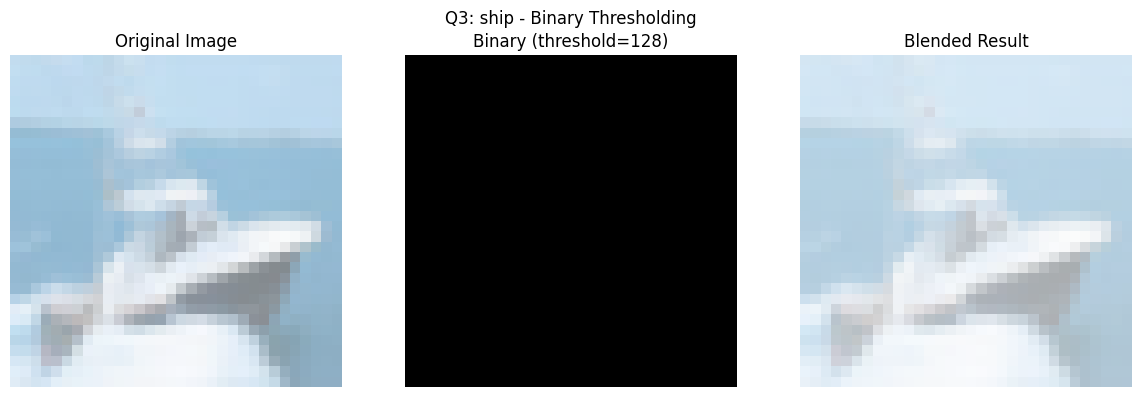

Processed ship


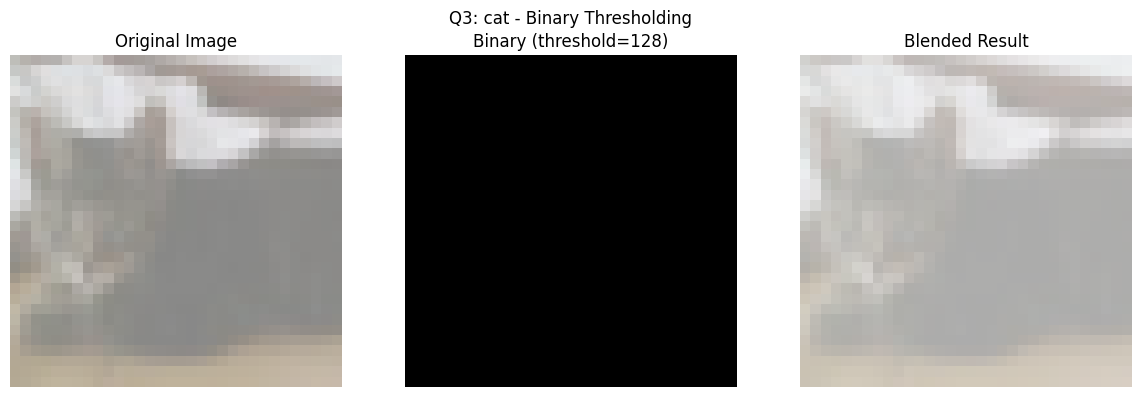

Processed cat


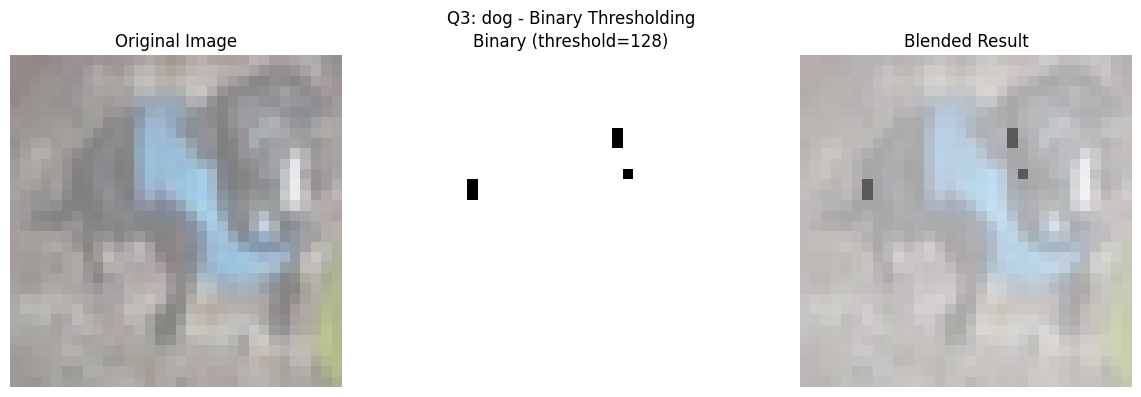

Processed dog


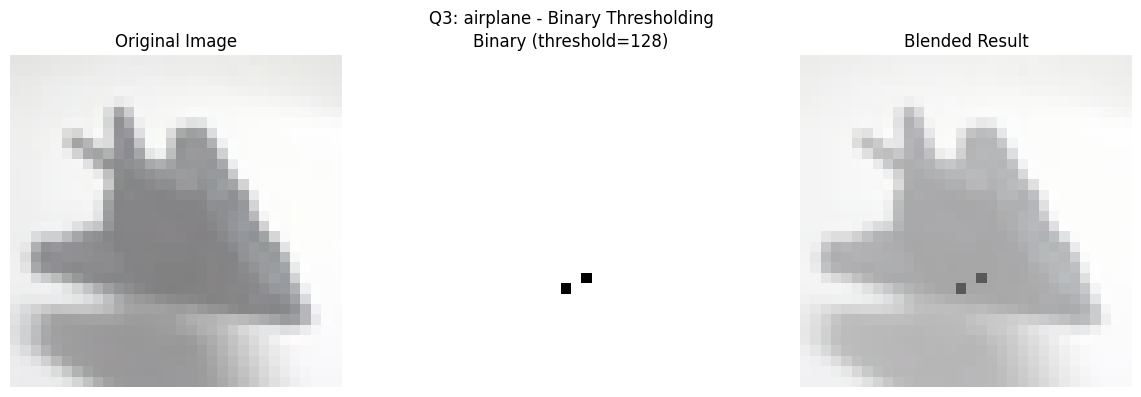

Processed airplane


In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convert tensor to NumPy image in [0,1] range
def tensor_to_np_image(tensor_img):
    img = tensor_img * 0.5 + 0.5  # Unnormalize
    img = img.permute(1, 2, 0)  # [C, H, W] → [H, W, C]
    return img.numpy()

def rgb_to_gray(image):
    """Convert RGB to grayscale"""
    image_uint8 = (image * 255).astype(np.uint8)
    return cv2.cvtColor(image_uint8, cv2.COLOR_RGB2GRAY)

def create_binary_threshold(image, threshold=128):
    """Create binary image using threshold"""
    gray_img = rgb_to_gray(image)
    binary_img = (gray_img > threshold).astype(np.uint8) * 255
    return binary_img

def blend_with_binary(original, binary_mask, alpha=0.3):
    """Blend original image with binary mask"""
    binary_3ch = np.stack([binary_mask / 255] * 3, axis=-1)
    blended = original * (1 - alpha) + binary_3ch * alpha
    return np.clip(blended, 0, 1)

def process_thresholding(tensor_img, class_name, threshold=128):
    """Process and display thresholding results"""
    image = tensor_to_np_image(tensor_img)
    binary_img = create_binary_threshold(image, threshold)
    blended_img = blend_with_binary(image, binary_img)

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(binary_img, cmap='gray')
    axes[1].set_title(f'Binary (threshold={threshold})')
    axes[1].axis('off')

    axes[2].imshow(blended_img)
    axes[2].set_title('Blended Result')
    axes[2].axis('off')

    plt.suptitle(f'Q3: {class_name} - Binary Thresholding')
    plt.tight_layout()
    plt.show()

# Process all 10 images
for i, (img_tensor, label) in enumerate(zip(selected_images, selected_labels)):
    process_thresholding(img_tensor, class_names[label])
    print(f"Processed {class_names[label]}")


##Q3

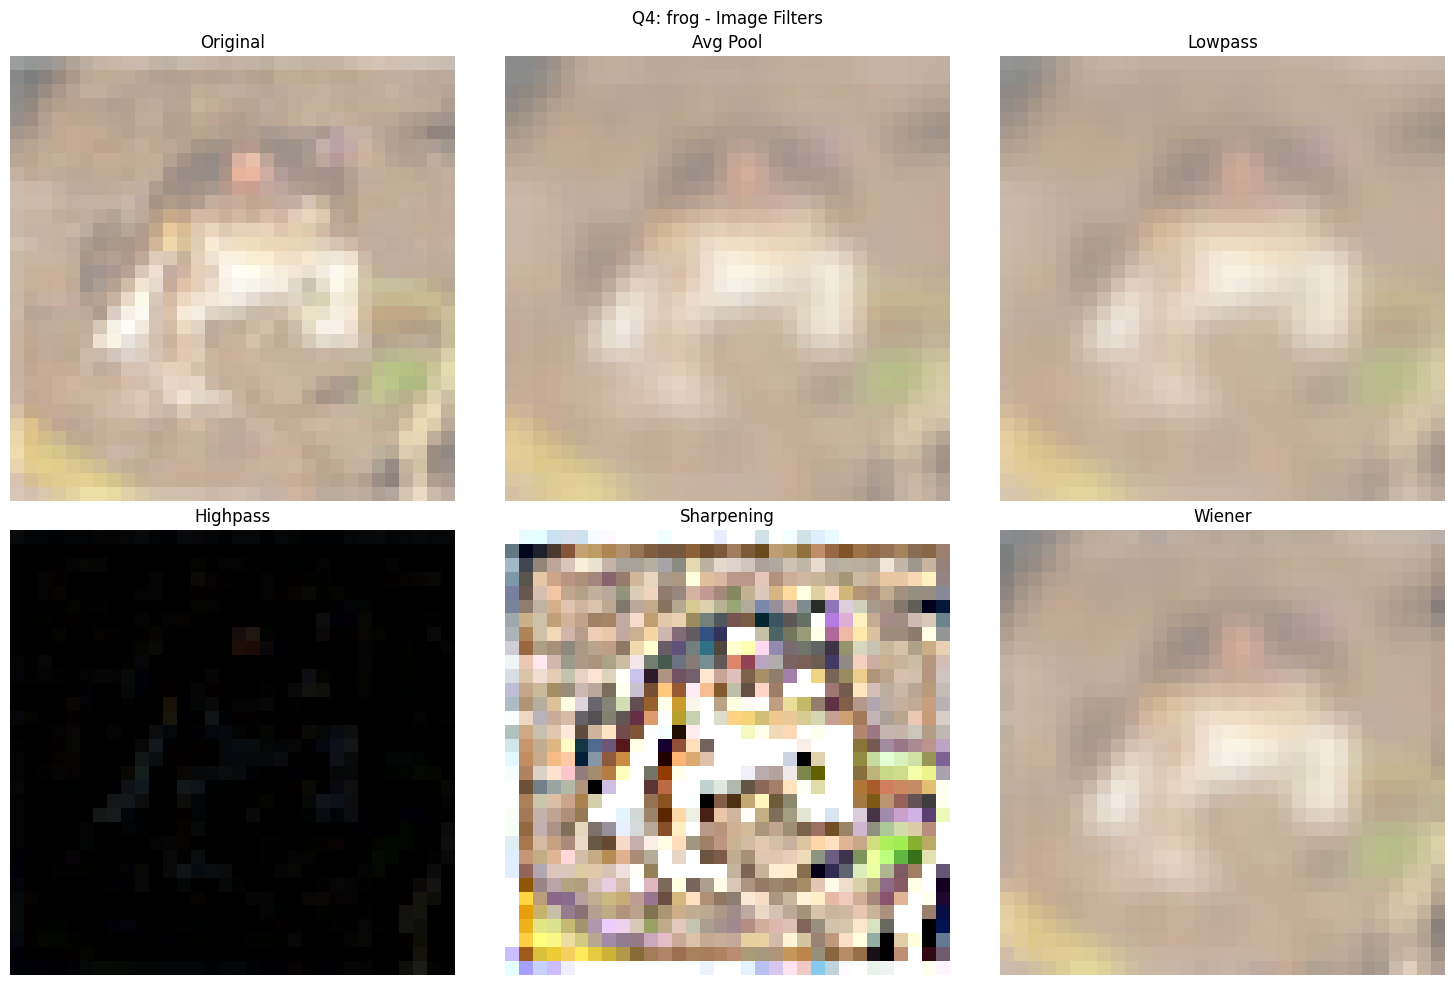

frog: Lowpass→Highpass difference = 0.7028
Processed frog


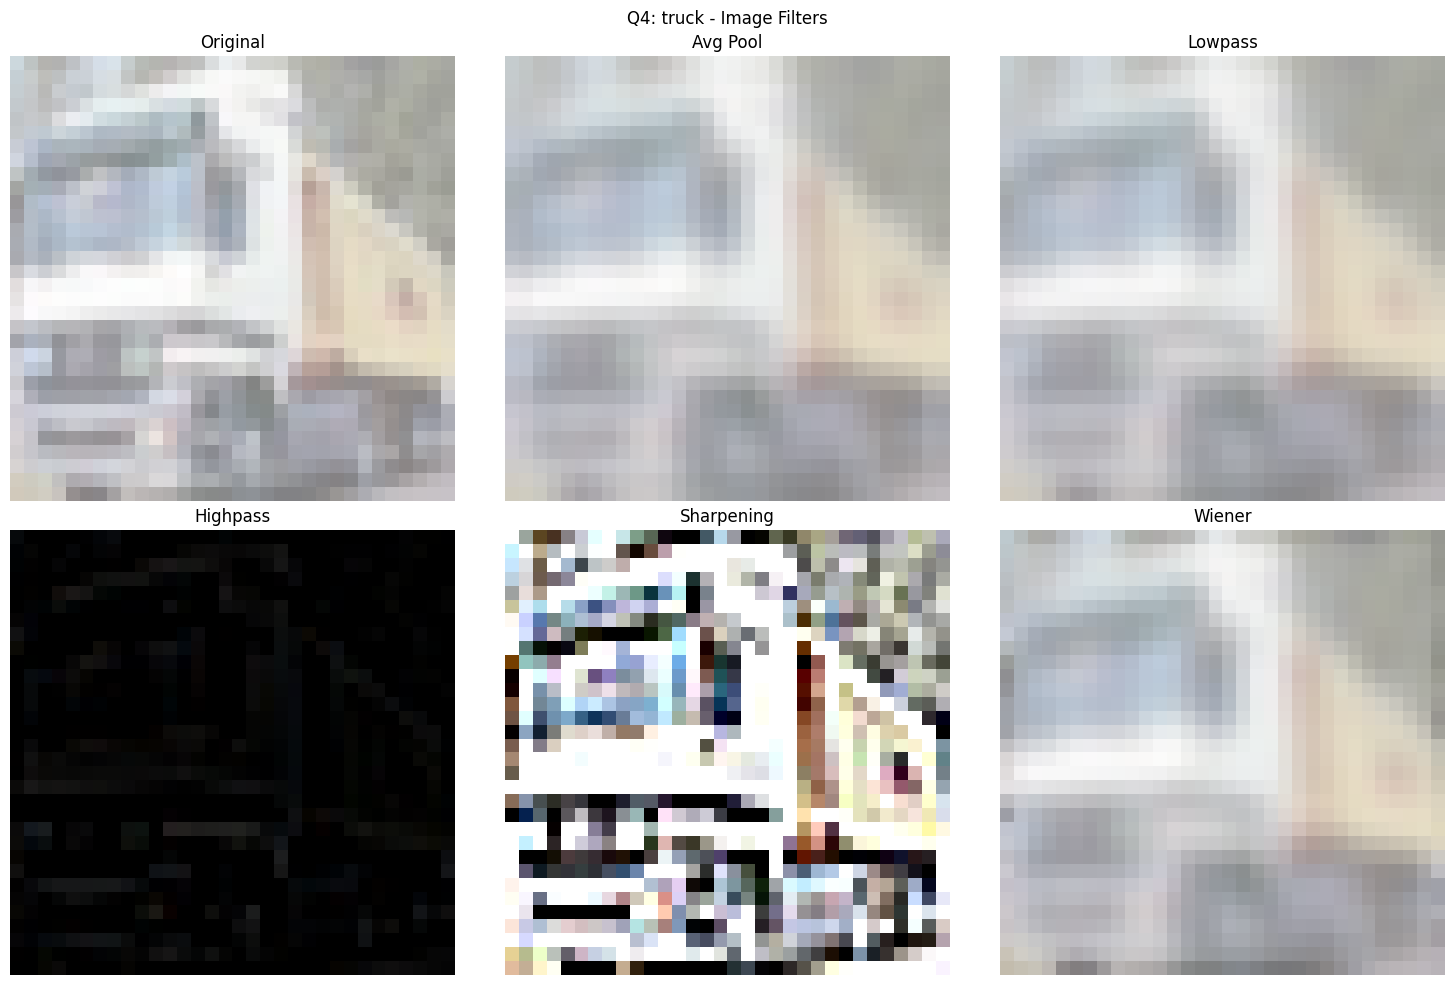

truck: Lowpass→Highpass difference = 0.7556
Processed truck


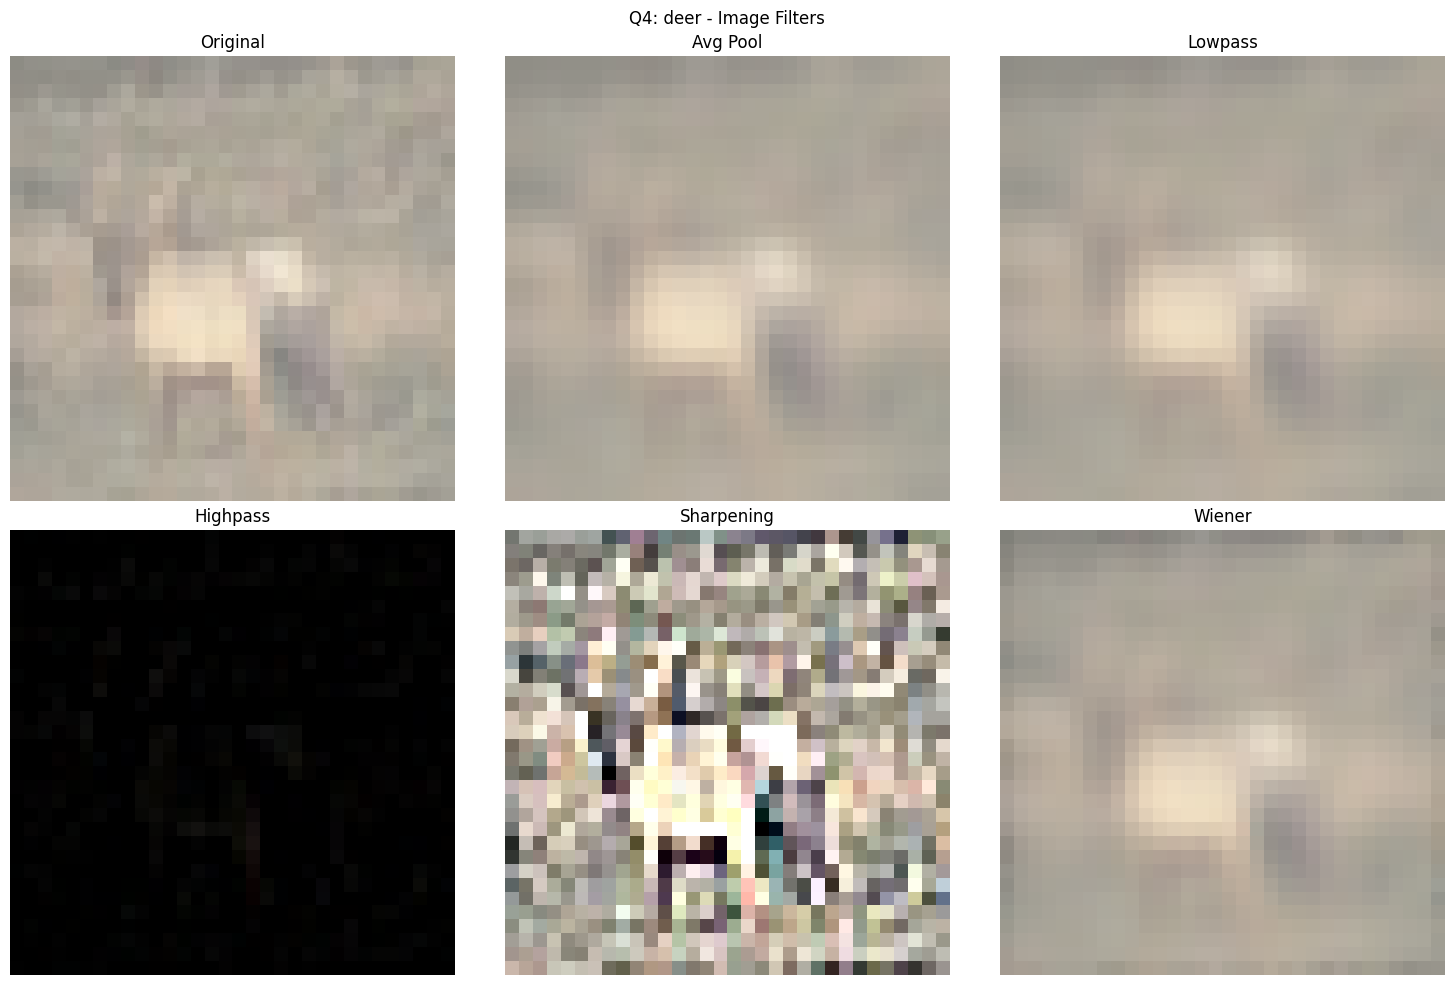

deer: Lowpass→Highpass difference = 0.6573
Processed deer


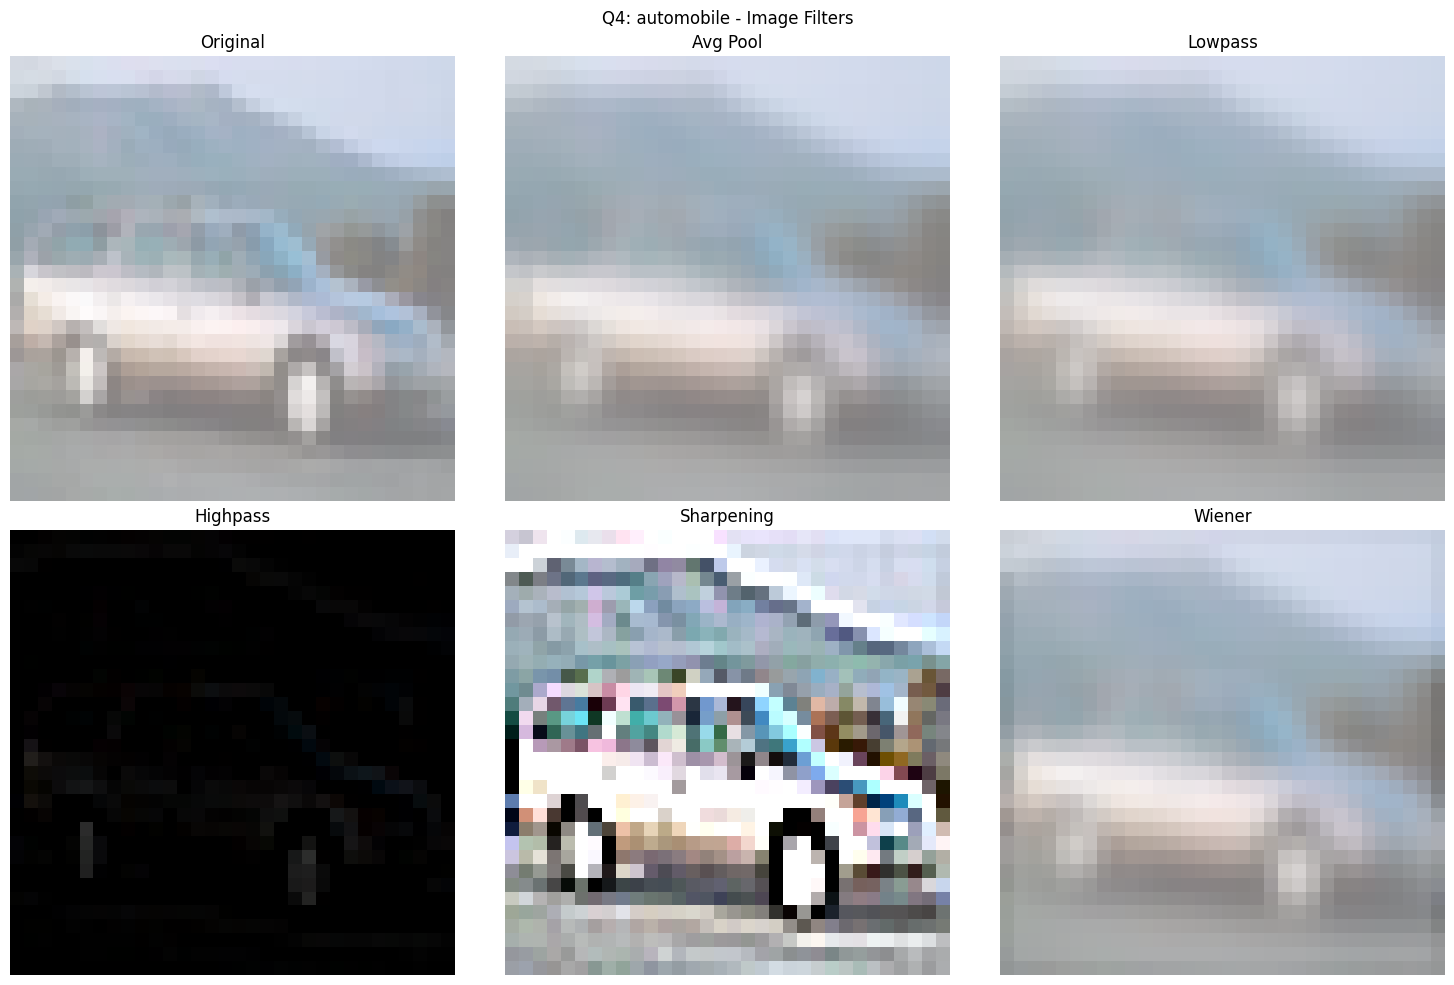

automobile: Lowpass→Highpass difference = 0.7029
Processed automobile


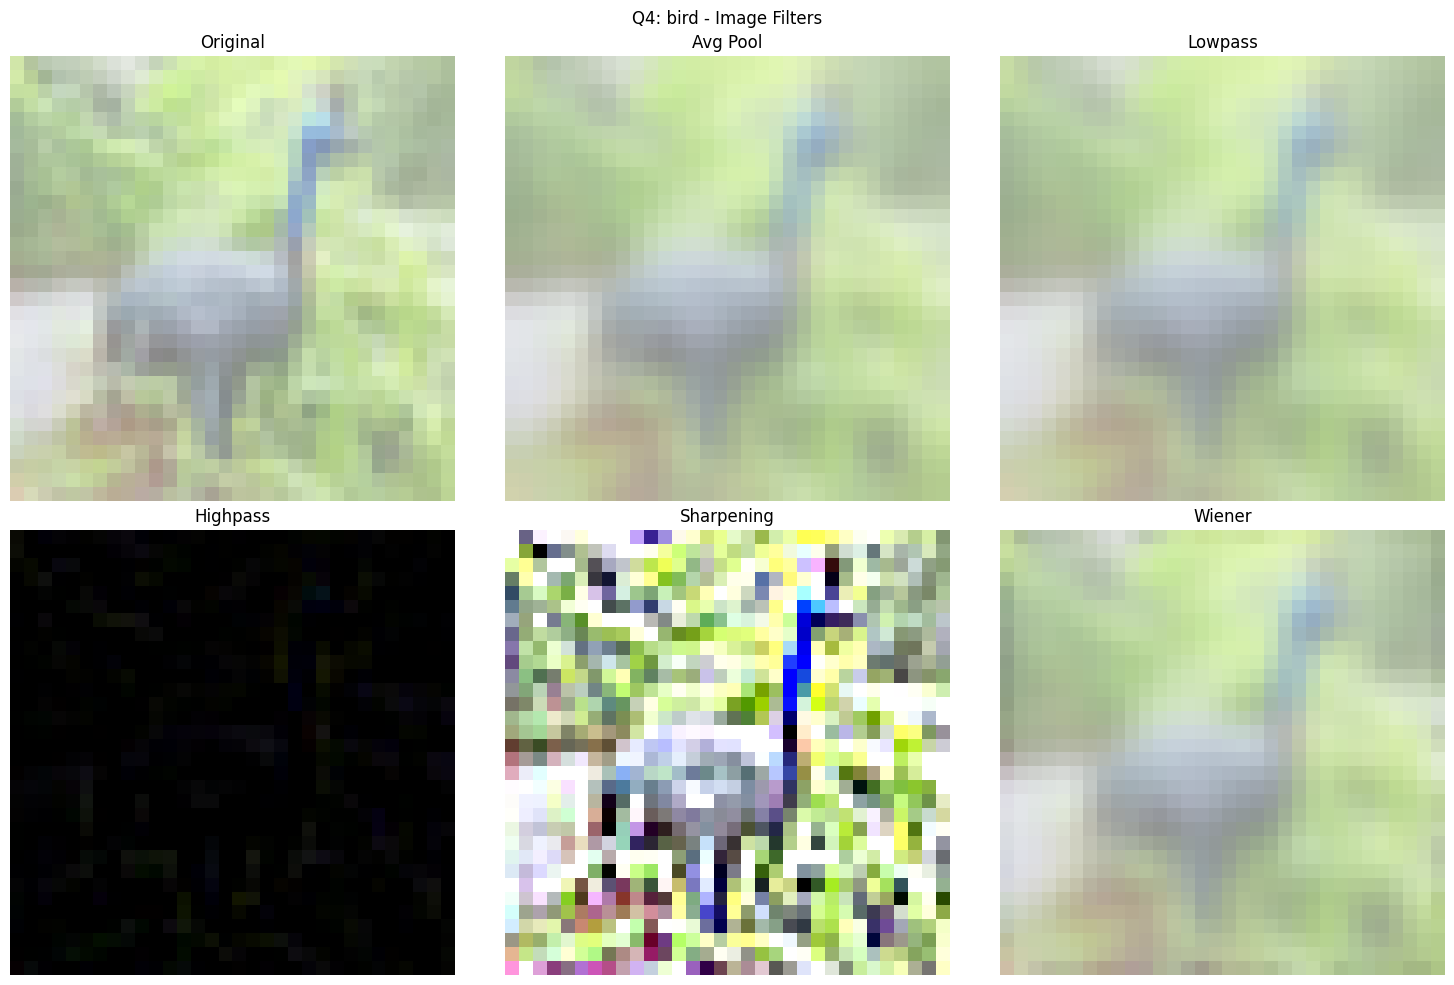

bird: Lowpass→Highpass difference = 0.7345
Processed bird


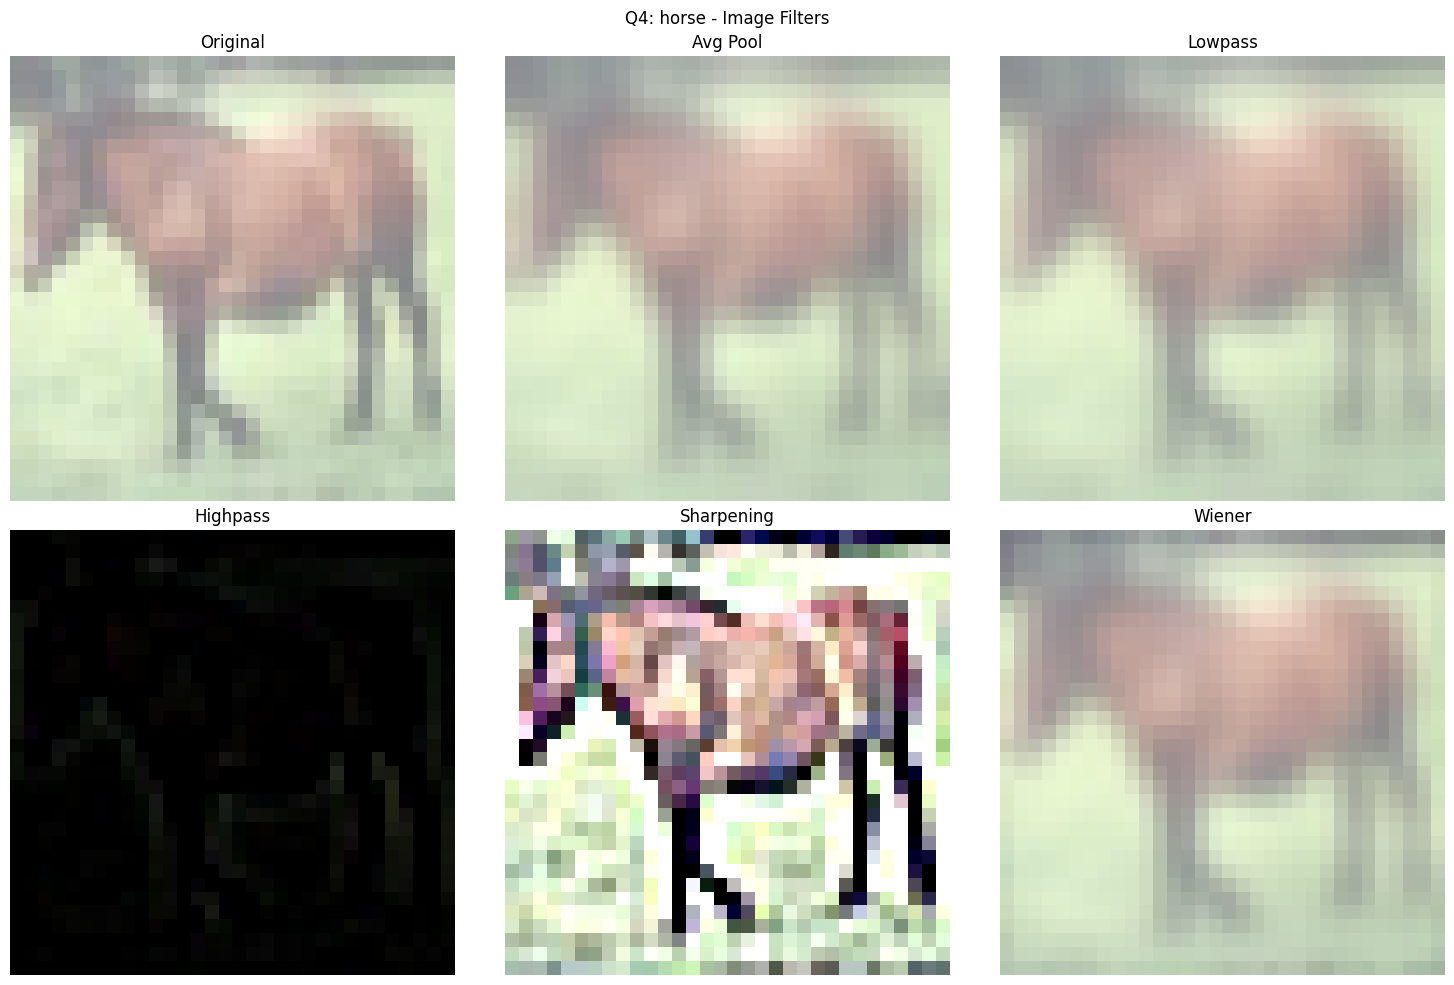

horse: Lowpass→Highpass difference = 0.7386
Processed horse


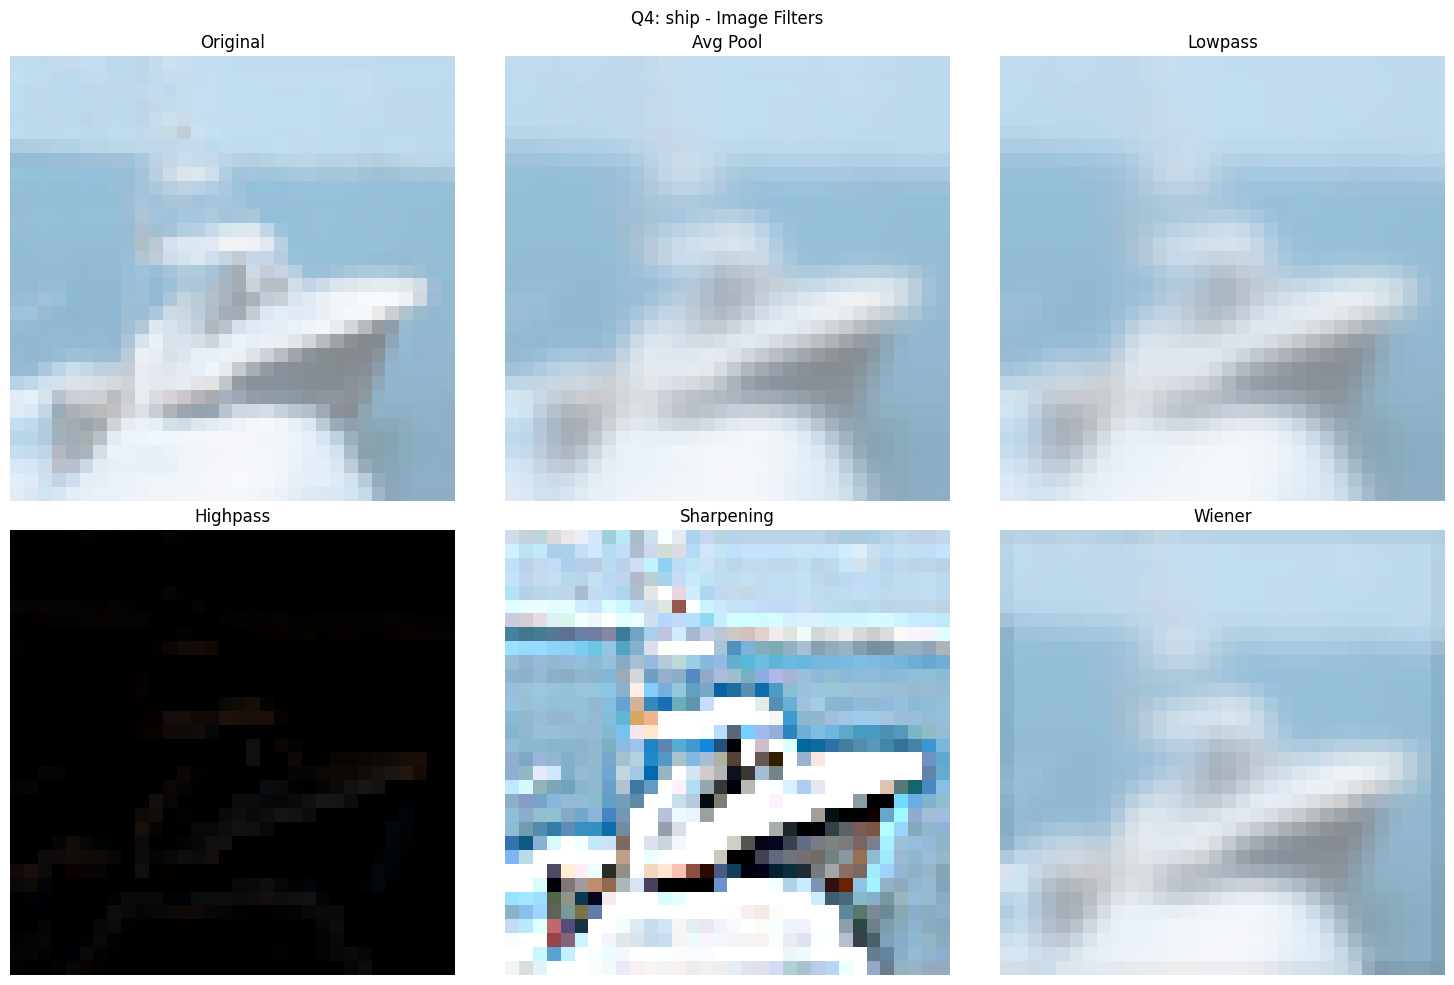

ship: Lowpass→Highpass difference = 0.7970
Processed ship


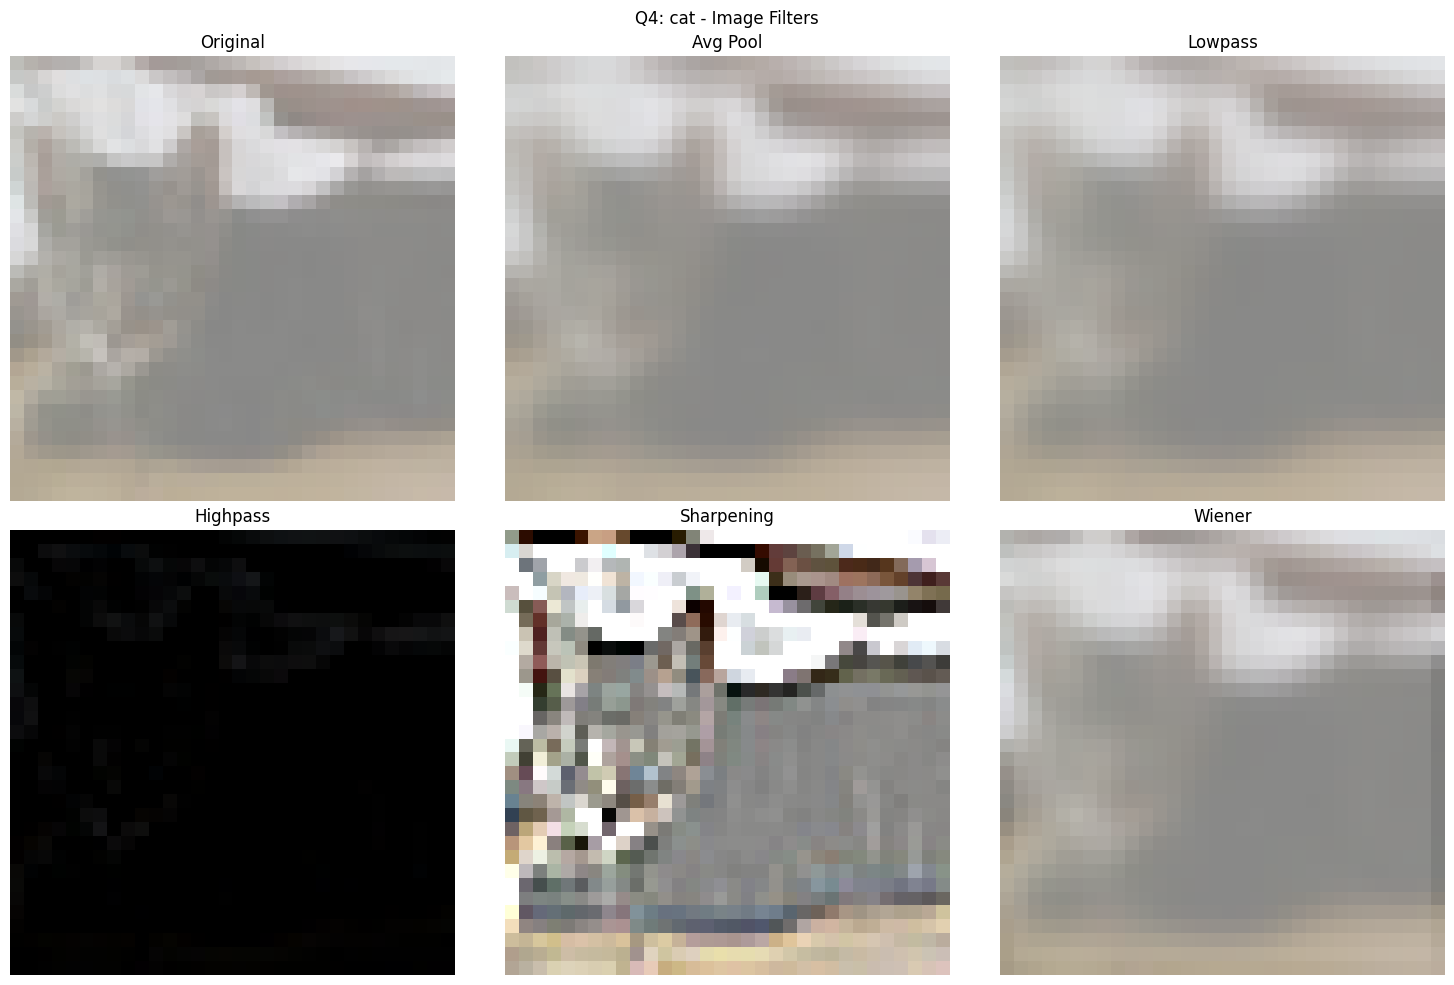

cat: Lowpass→Highpass difference = 0.6382
Processed cat


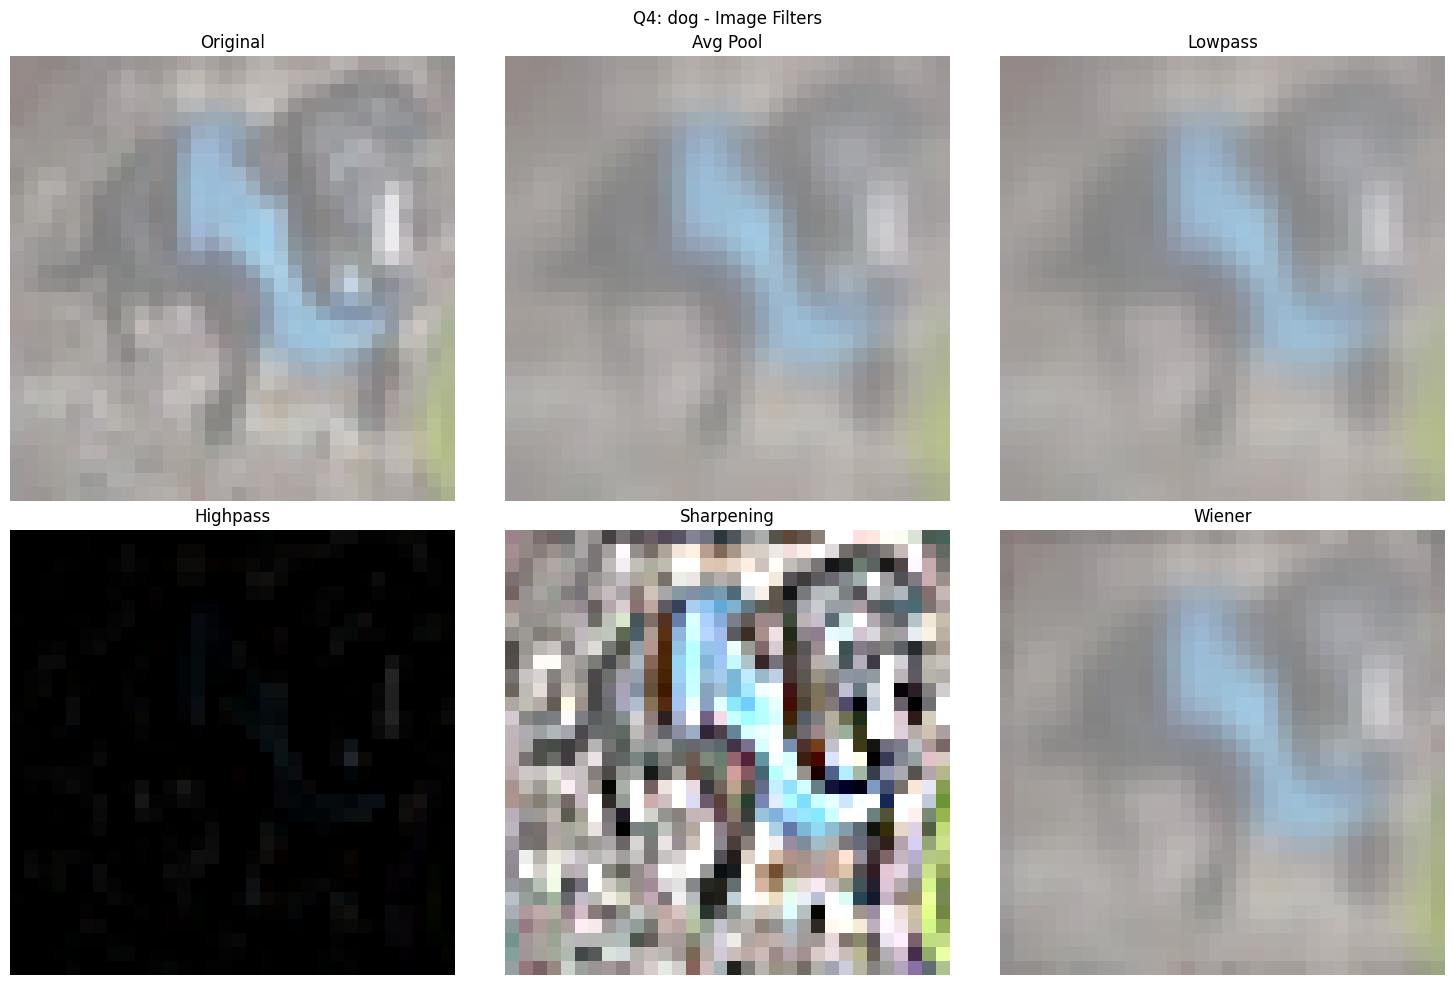

dog: Lowpass→Highpass difference = 0.6375
Processed dog


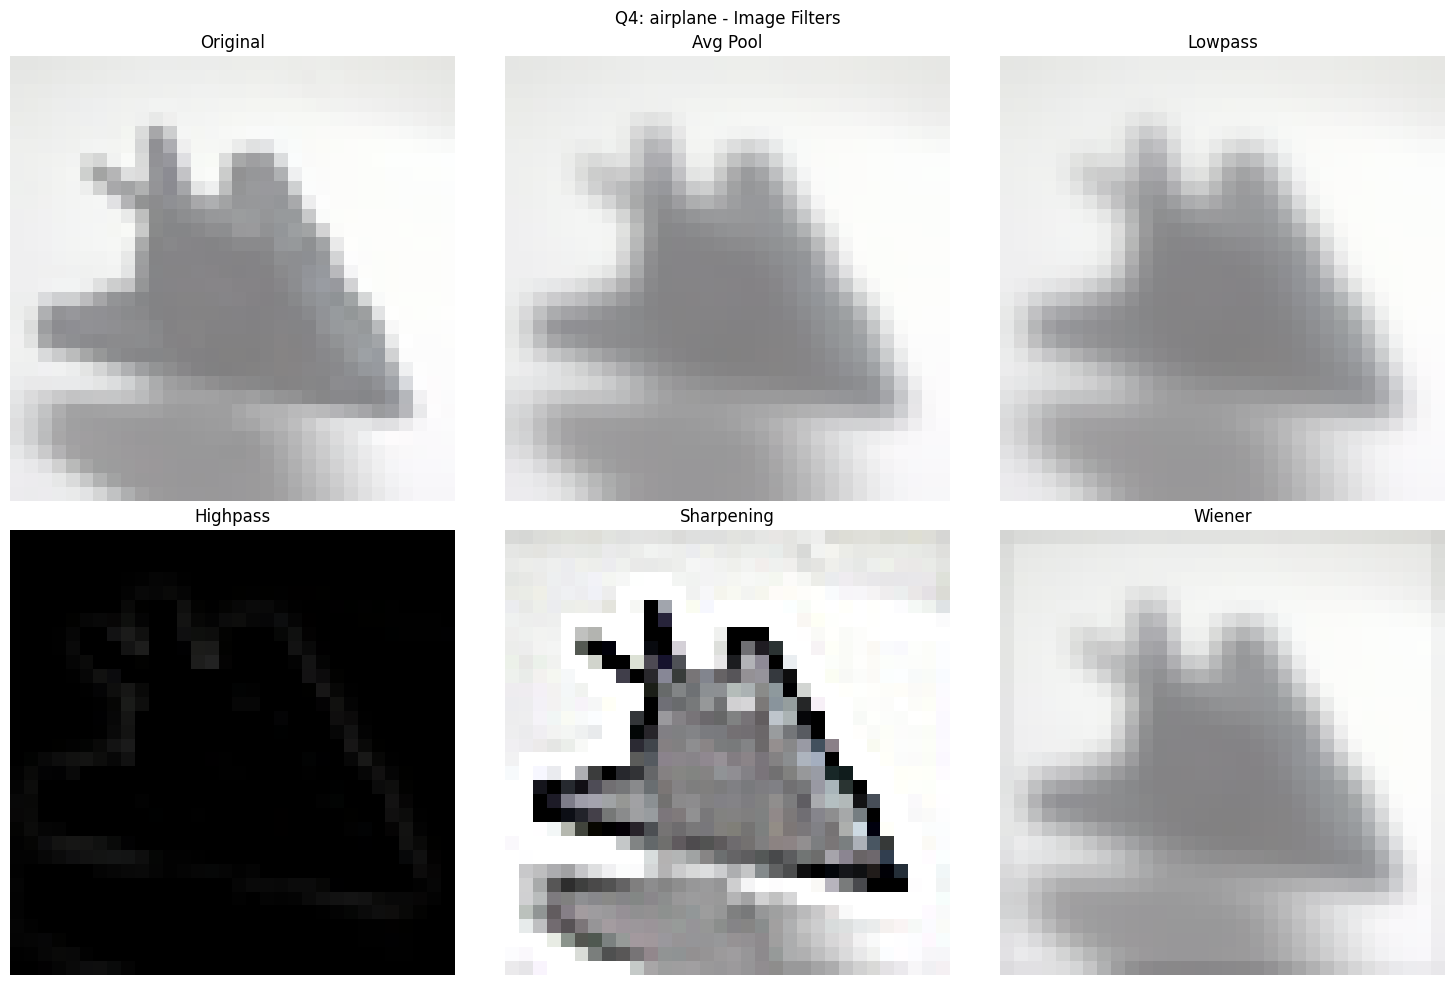

airplane: Lowpass→Highpass difference = 0.7914
Processed airplane

Observations:
- Avg Pool: Smooths image by averaging neighborhoods
- Lowpass: Removes high frequencies, blurs image
- Highpass: Emphasizes edges and details
- Sharpening: Enhances edge contrast
- Wiener: Reduces noise while preserving details


In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.signal import wiener

# --- Helper to convert PyTorch tensor to NumPy image ---
def tensor_to_np_image(tensor_img):
    img = tensor_img * 0.5 + 0.5  # Unnormalize
    img = img.permute(1, 2, 0)   # [C, H, W] → [H, W, C]
    return img.numpy()

# --- Filter implementations ---
def avg_pool_filter(image):
    kernel = np.ones((3, 3)) / 9
    if image.ndim == 3:
        filtered = np.zeros_like(image)
        for i in range(3):
            filtered[:, :, i] = cv2.filter2D(image[:, :, i], -1, kernel)
    else:
        filtered = cv2.filter2D(image, -1, kernel)
    return filtered

def lowpass_filter(image):
    if image.ndim == 3:
        filtered = np.zeros_like(image)
        for i in range(3):
            filtered[:, :, i] = ndimage.gaussian_filter(image[:, :, i], sigma=1)
    else:
        filtered = ndimage.gaussian_filter(image, sigma=1)
    return filtered

def highpass_filter(image):
    return image - lowpass_filter(image)

def sharpening_filter(image):
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    if image.ndim == 3:
        filtered = np.zeros_like(image)
        for i in range(3):
            filtered[:, :, i] = cv2.filter2D(image[:, :, i], -1, kernel)
    else:
        filtered = cv2.filter2D(image, -1, kernel)
    return np.clip(filtered, 0, 1)

def wiener_filter_simple(image):
    if image.ndim == 3:
        filtered = np.zeros_like(image)
        for i in range(3):
            filtered[:, :, i] = wiener(image[:, :, i], (3, 3))
    else:
        filtered = wiener(image, (3, 3))
    return np.clip(filtered, 0, 1)

# --- Apply and display filters ---
def apply_all_filters(tensor_img, class_name):
    image = tensor_to_np_image(tensor_img)

    filters = {
        'Avg Pool': avg_pool_filter,
        'Lowpass': lowpass_filter,
        'Highpass': highpass_filter,
        'Sharpening': sharpening_filter,
        'Wiener': wiener_filter_simple
    }

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    axes[0, 0].imshow(image)
    axes[0, 0].set_title('Original')
    axes[0, 0].axis('off')

    positions = [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
    for i, (name, func) in enumerate(filters.items()):
        filtered = func(image.copy())
        r, c = positions[i]
        axes[r, c].imshow(np.clip(filtered, 0, 1))
        axes[r, c].set_title(name)
        axes[r, c].axis('off')

    plt.suptitle(f'Q4: {class_name} - Image Filters')
    plt.tight_layout()
    plt.show()

    # Extra check: lowpass then highpass
    lowpassed = lowpass_filter(image)
    low_then_high = highpass_filter(lowpassed)
    diff = np.mean(np.abs(image - low_then_high))
    print(f"{class_name}: Lowpass→Highpass difference = {diff:.4f}")

# --- Process all images ---
for img_tensor, label in zip(selected_images, selected_labels):
    apply_all_filters(img_tensor, class_names[label])
    print(f"Processed {class_names[label]}")

print("\nObservations:")
print("- Avg Pool: Smooths image by averaging neighborhoods")
print("- Lowpass: Removes high frequencies, blurs image")
print("- Highpass: Emphasizes edges and details")
print("- Sharpening: Enhances edge contrast")
print("- Wiener: Reduces noise while preserving details")


##Q5

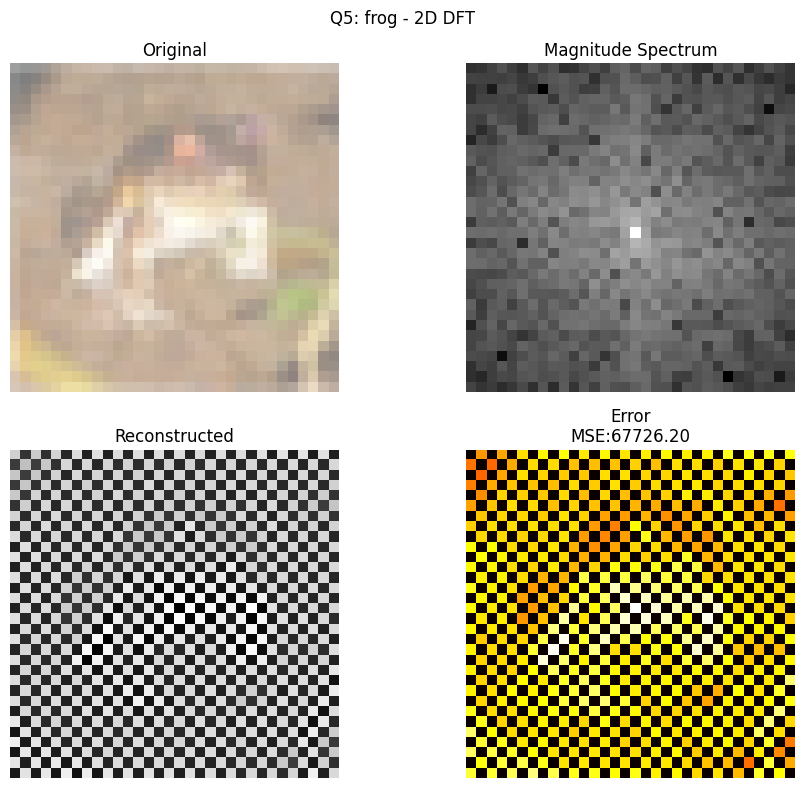

frog: MSE=67726.195312, MAE=182.878906


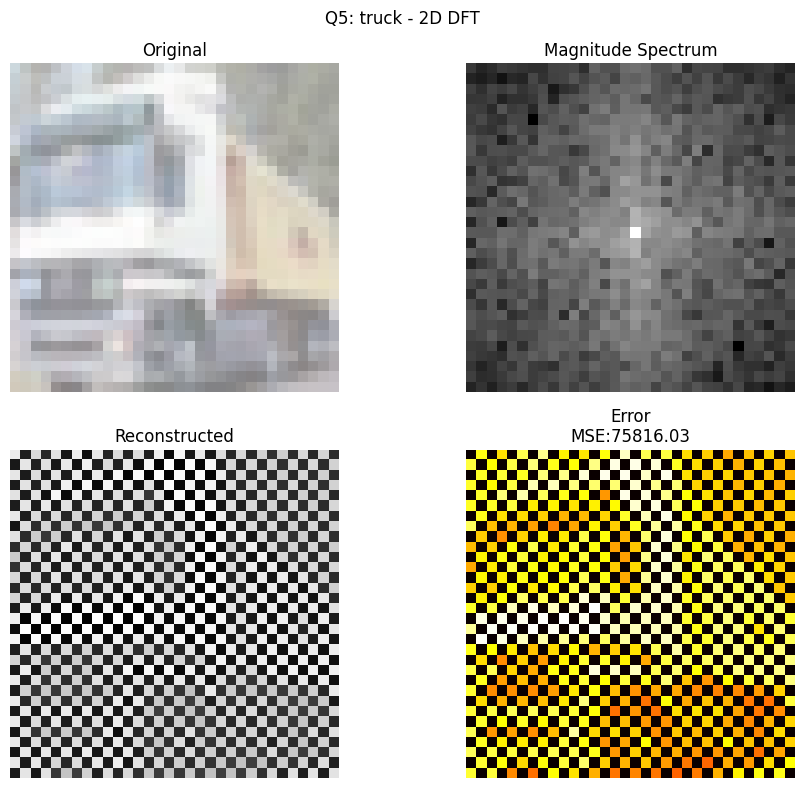

truck: MSE=75816.031250, MAE=192.378906


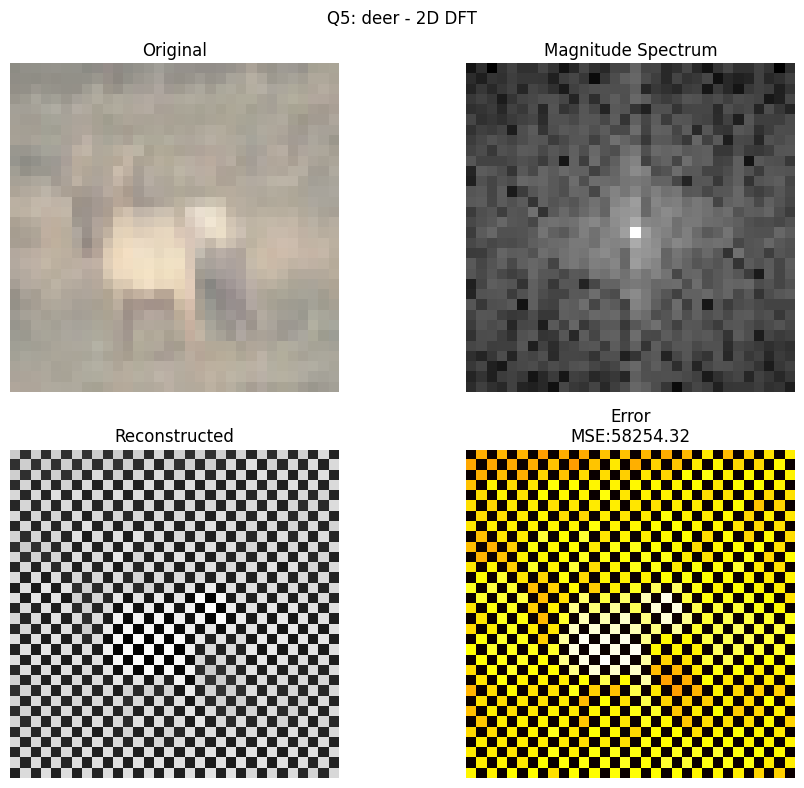

deer: MSE=58254.324219, MAE=169.888672


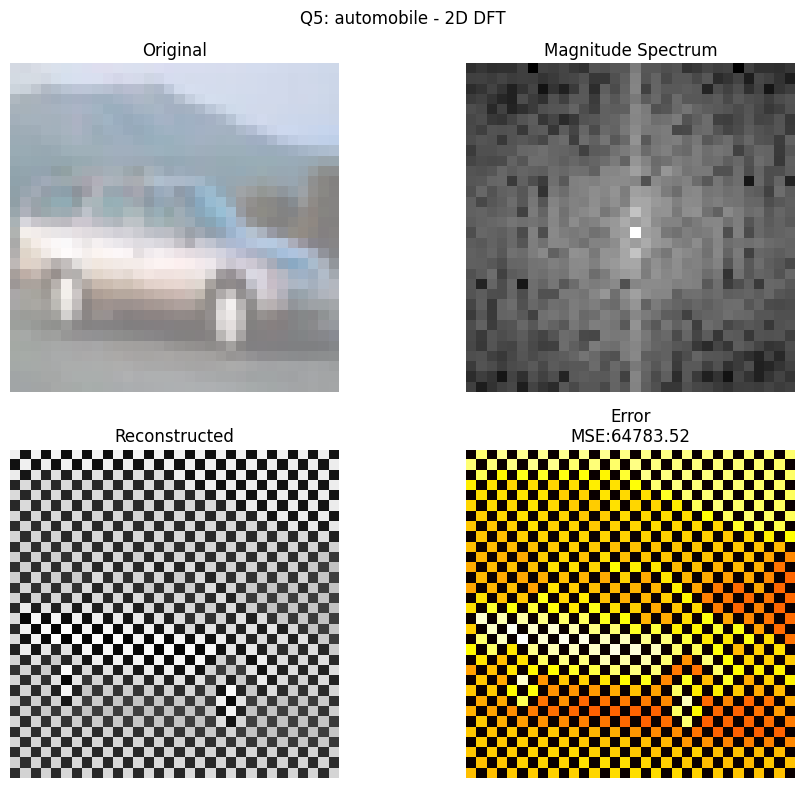

automobile: MSE=64783.519531, MAE=177.701172


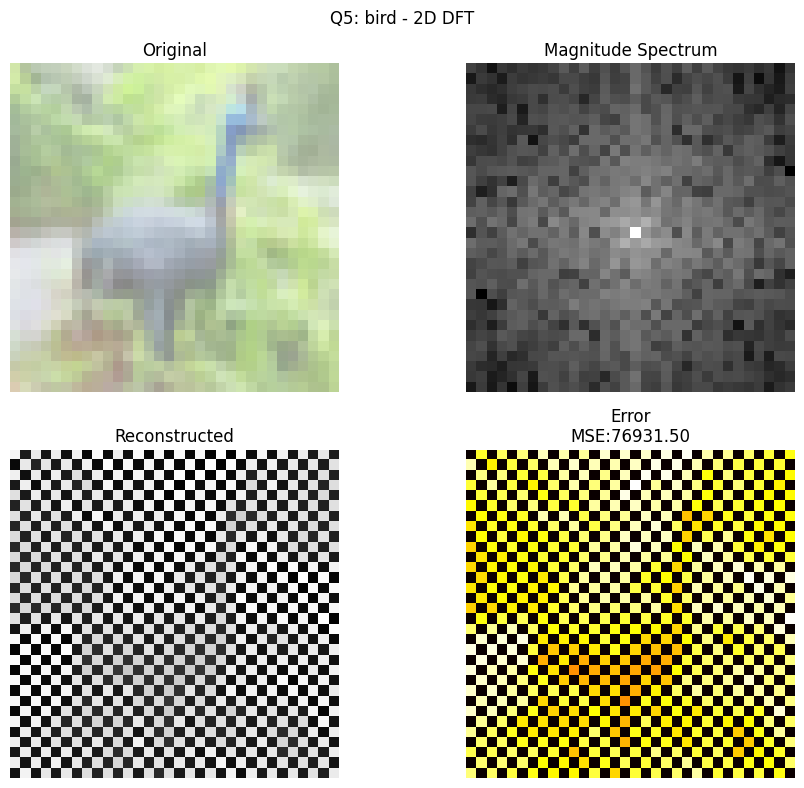

bird: MSE=76931.500000, MAE=194.943359


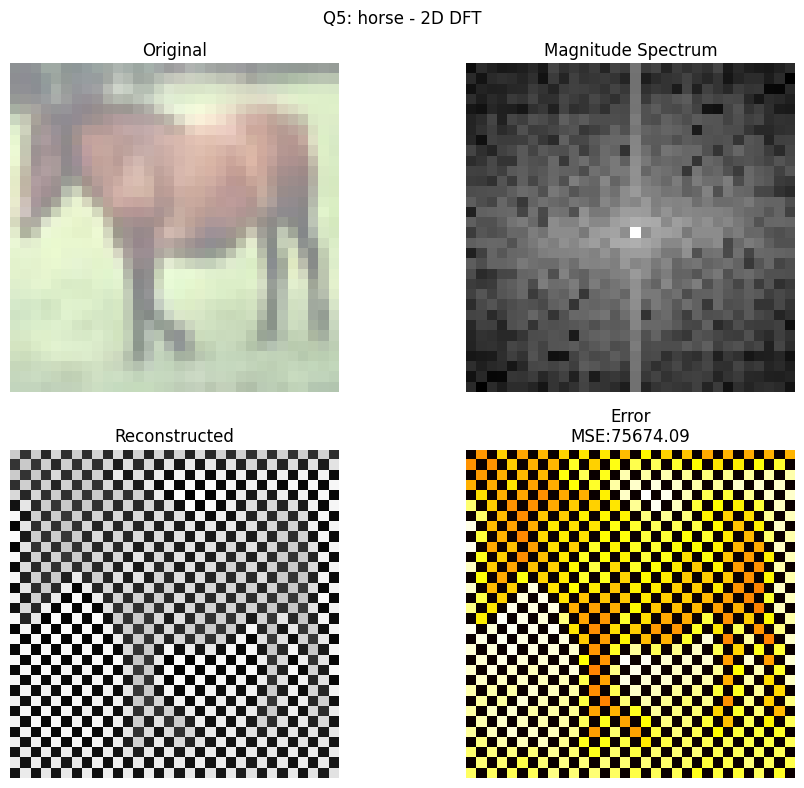

horse: MSE=75674.093750, MAE=192.164062


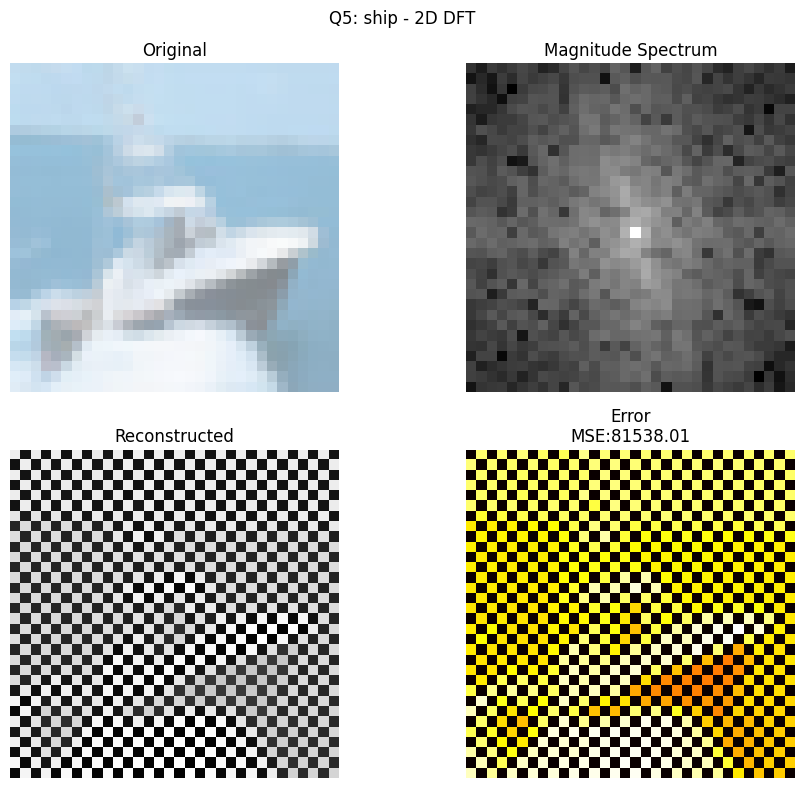

ship: MSE=81538.007812, MAE=200.242188


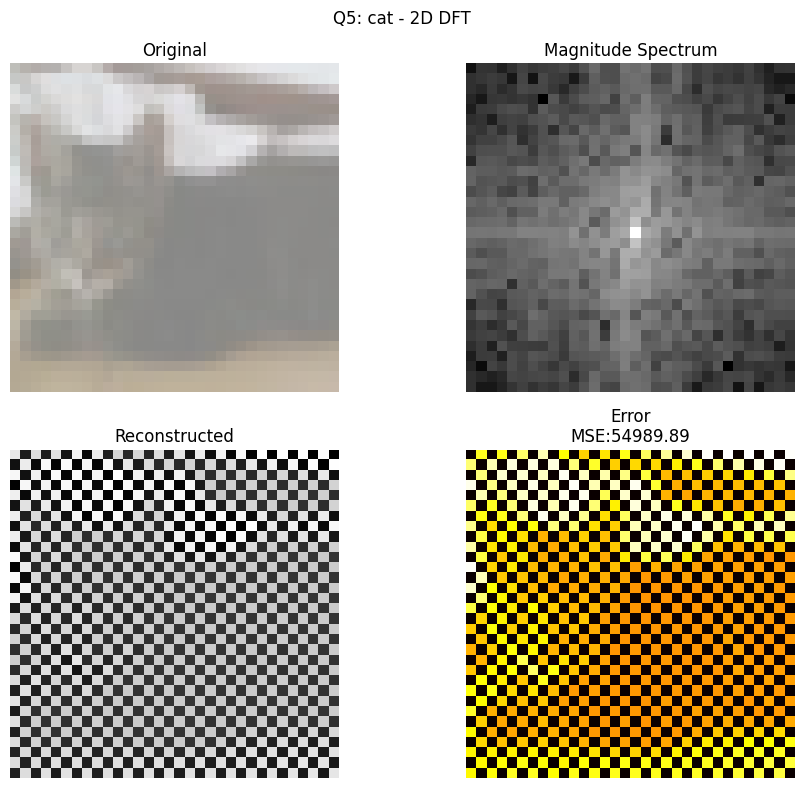

cat: MSE=54989.890625, MAE=163.441406


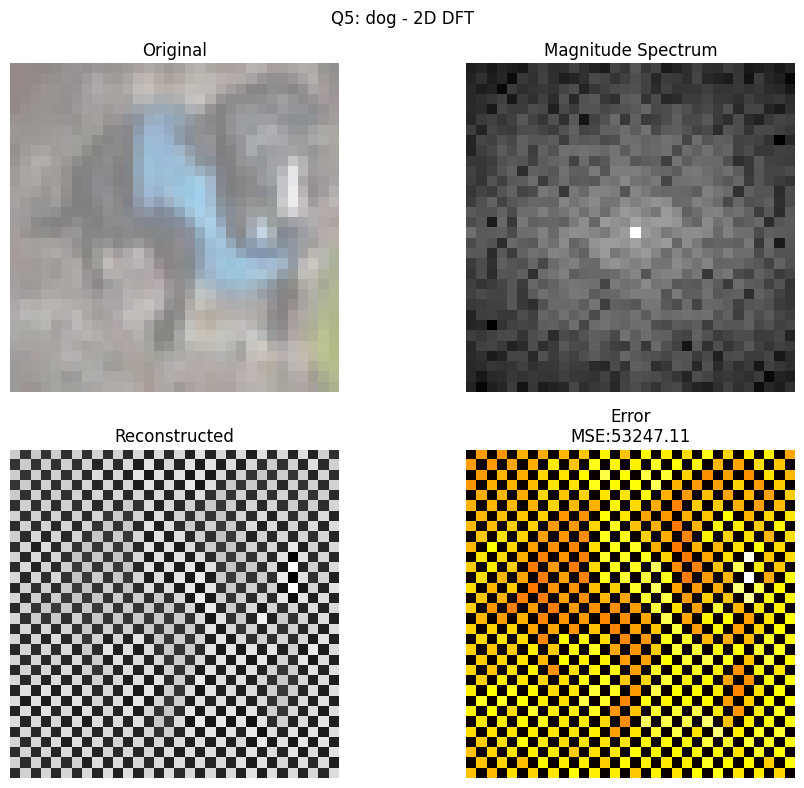

dog: MSE=53247.109375, MAE=162.230469


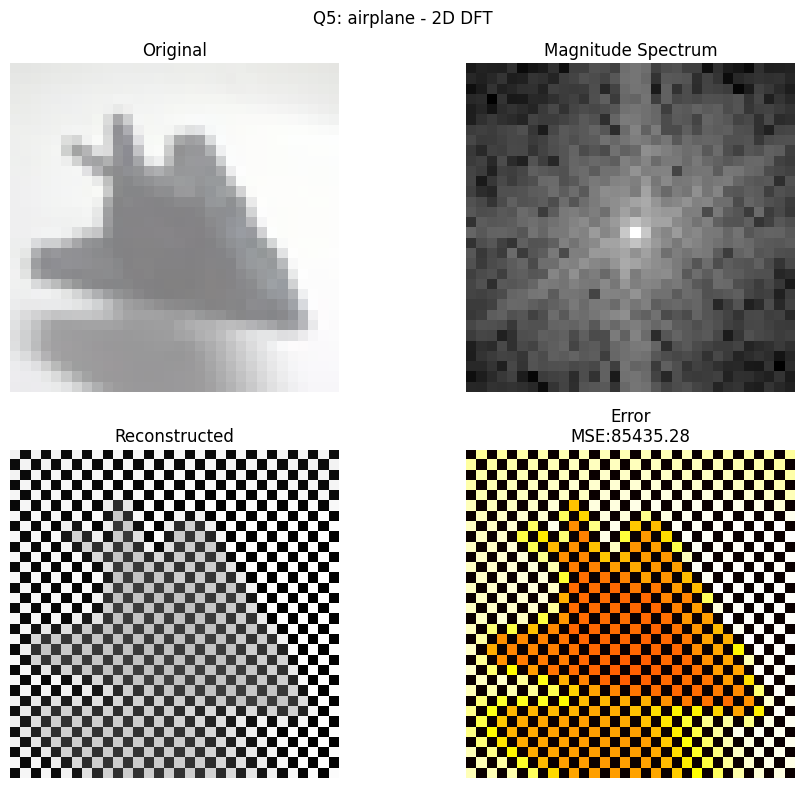

airplane: MSE=85435.281250, MAE=201.484375

Summary:
- DFT converts to frequency domain
- Inverse DFT reconstructs original image
- Small errors due to floating-point precision
- Perfect reconstruction theoretically possible


In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Helper: Convert PyTorch tensor to NumPy image ---
def tensor_to_np_image(tensor_img):
    img = tensor_img * 0.5 + 0.5  # Unnormalize
    img = img.permute(1, 2, 0)   # [C, H, W] → [H, W, C]
    return img.numpy()

def rgb_to_gray(image):
    """Convert RGB to grayscale"""
    return cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

def compute_2d_dft(image):
    """Compute 2D DFT"""
    if len(image.shape) == 3:
        gray = rgb_to_gray(image).astype(np.float32)
    else:
        gray = (image * 255).astype(np.float32)

    dft = np.fft.fft2(gray)
    dft_shifted = np.fft.fftshift(dft)
    return dft, dft_shifted

def inverse_2d_dft(dft):
    """Compute inverse 2D DFT"""
    dft_ishifted = np.fft.ifftshift(dft)
    reconstructed = np.fft.ifft2(dft_ishifted)
    return np.real(reconstructed)

def calculate_error(original, reconstructed):
    """Calculate reconstruction error"""
    if len(original.shape) == 3:
        original_gray = rgb_to_gray(original).astype(np.float32)
    else:
        original_gray = (original * 255).astype(np.float32)

    mse = np.mean((original_gray - reconstructed) ** 2)
    mae = np.mean(np.abs(original_gray - reconstructed))
    return mse, mae

def process_dft(tensor_img, class_name):
    """Process image with DFT and display results"""
    image = tensor_to_np_image(tensor_img)

    # Compute DFT
    dft, dft_shifted = compute_2d_dft(image)
    magnitude_spectrum = np.log(np.abs(dft_shifted) + 1)

    # Reconstruct
    reconstructed = inverse_2d_dft(dft)

    # Calculate error
    mse, mae = calculate_error(image, reconstructed)

    # Display
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes[0, 0].imshow(image)
    axes[0, 0].set_title('Original')
    axes[0, 0].axis('off')

    axes[0, 1].imshow(magnitude_spectrum, cmap='gray')
    axes[0, 1].set_title('Magnitude Spectrum')
    axes[0, 1].axis('off')

    axes[1, 0].imshow(reconstructed, cmap='gray')
    axes[1, 0].set_title('Reconstructed')
    axes[1, 0].axis('off')

    # Error visualization
    if len(image.shape) == 3:
        orig_gray = rgb_to_gray(image)
    else:
        orig_gray = (image * 255).astype(np.uint8)

    error_img = np.abs(orig_gray.astype(np.float32) - np.clip(reconstructed, 0, 255))
    axes[1, 1].imshow(error_img, cmap='hot')
    axes[1, 1].set_title(f'Error\nMSE:{mse:.2f}')
    axes[1, 1].axis('off')

    plt.suptitle(f'Q5: {class_name} - 2D DFT')
    plt.tight_layout()
    plt.show()

    print(f"{class_name}: MSE={mse:.6f}, MAE={mae:.6f}")

# Process all images
for img, label in zip(selected_images, selected_labels):
    process_dft(img, class_names[label])

print("\nSummary:")
print("- DFT converts to frequency domain")
print("- Inverse DFT reconstructs original image")
print("- Small errors due to floating-point precision")
print("- Perfect reconstruction theoretically possible")
